# Chinese Elders Unsatisfied?

<img src="http://carnegieendowment.org/images/article_images/2013-07-05_old-Chinese_605.jpg" width=640 height=480/>




### Data Source:
- CHARLS  (China Health and Retirement Longitudinal Study) collects high quality informaiton from more than 18,000 nationally representative samples of Chinese residents ages 45 and above every two years starting from 2011. The dataset includes tremendous amount of information, featuring individual and household income and expenditure, life styles, recent mental status, health status and family information. We are primarily using the 2013 dataset.  

- source see [CHARLS Website](http://charls.ccer.edu.cn/en)


### Background:
- "life satisfaction" is a very interesting measurement to show how a person feel about one's life and the future. Here is a quote from [Wikipedia on life satisfaction](https://en.wikipedia.org/wiki/Life_satisfaction):
> *Life satisfaction is the way persons evaluate their lives and how they feel about where they are going in the future. It is a measure of well-being and may be assessed in terms of mood, satisfaction with relations with others and with achieved goals, self-concepts, and self-perceived ability to cope with daily life. It is having a favorable attitude of one's life as a whole rather than an assessment of current feelings. Life satisfaction has been measured in relation to economic standing, amount of education, experiences, and residence, as well as many other topics.*

- [OECD better life index](http://www.oecdbetterlifeindex.org/topics/life-satisfaction/) also include "life satisfaction" as measurement, and in their opinion:
>*Life satisfaction measures how people evaluate their life **as a whole** rather than their current feelings. *

It's intriguing to see that the OECD definition stresses on "evaluating life as a whole" while respondents would most likely be affected by recent moods or recent life events. This would be one example factor (recent moods) that we could assess. 

The definition and composition of "Life satisfaction" for different populations would also be very different, for example Western and Eastern populations have very different socio-economic context and cultural context. There are a few studies on life satsifaction scales on Chinese subpopulations, most of which suggested that "family" would play an important role in life satisfaction for Chinese. One study by _Lou et al._ on life satisfaction scales of Chinese elders presented neat evidence on the factors affecting life satisfaction and suggested an eight-domain metrics for assessing life satisfaction: family relationships, friendship, partner, intergenerational communication, health, finance, housing and food/meals [Development and Validation of a Life Satisfaction Scale for Chinese Elders](http://www.ncbi.nlm.nih.gov/pubmed/20063848)(_International Journal of Aging and Human Development, 2008, Vol.67(2), p.149-170_).  For our analyses, some of the domains might not be available due to missing values (e.g. friendship) as CHARLES is not specifically designed for life satisfaction study purpose, but new insights could be provided with the huge amount of features available. 


### Goal:
- We are curious about the factors of self commented life satisfaction for Chinese residents in their later adulthood.  Many factors could contribute to the satisfaction level, like health status, recent feelings, expenditure etc. Although survey data cannot provide insight into the causal relations, it is possible to examine the associations between self commented life satisfaction level and various factors collected through CHARLS, using feature selection methods and regression models.
- We are also curious whether we could make predictions on life satisfaction based on personal information for Chinese residents aged 45 and above.


### Method:

- EDA for continuous features and indicators by Kernel-density plot and histogram respectively
- EDA for some specific features shown on our website [CS109 Mamma Mia - features](https://sites.google.com/site/cs109mamamia/feature)
- Association : linear and logistic regression with lasso based feature selection & final model building.
- Prediction: linear SVM classifier, also consider logistic regression with lasso based feature selection and piplined classifier to improve the SVM. 



### Partial Result: (details in specific sections)
Our final dataset:
- Number of observations: 3784;
- Number of features: 101;

Association analysis:
- Linear regression and logistic regression models: use top 15 features from feature selection to fit linear and logistic models respectively. Both models agree on most of the significant features. **Please see details in Part 5**.

Prediction analysis:
- Prediction by SVM linear classifier and L1-penalty logistic regression: 0.8 accuracy


### Project Website:
[CS109 Mamma Mia_Website](https://sites.google.com/site/cs109mamamia/home-1)

### Screencast Website:
[CS109 Mamma Mia_Video](https://vimeo.com/148566284)

## Table of Contents
* [Part 1: Cleaning dataset](#Part 1 Cleaning dataset)
    * [1.1: Cleaning the demographic background dataset](#1.1)
    * [1.2: Cleaning the health status and functioning dataset](#1.2)
    * [1.3: Cleaning the household income dataset](#1.3)
    * [1.4: Cleaning the individual income dataset](#1.4)
    * [1.5: Cleaning the family information dataset](#1.5)
    * [1.6: Extracting the life satisfaction dataset](#1.6)
* [Part 2: Merging dataset (Generating datasets final_df and final_i)](#part 2)
* [Part 3: Analysis for life satisfaction association using original categorical data (final_df dataset)](#part 3)
    * [3.1: Exploratory Data Analysis](#3.1)
        * [3.1.1: Plot Analysis](#3.1.1)
        * [3.1.2: Univariate Analysis](#3.1.2)
    * [3.2: Feature Selection and Model building](#3.2)
        * [3.2.1: Model without subsampling, Lasso Stability Path](#3.2.1)
        * [3.2.2: Feature selection with subsampling (Lasso approach)](#3.2.2)
        * [3.2.3: Model building: linear regression and multinomial logsitic regression](#3.2.3)
* [Part 4: Analysis for life satisfaction association using binary data (final_i dataset)](#part4)
    * [4.1: Exploratory Data Analysis](#4.1)
        * [4.1.1: Plot Analysis](#4.1.1)
        * [4.1.2: Univariate Analysis](#4.1.2)
    * [4.2: Feature Selection and Model building](#4.2)
        * [4.2.1: Model without subsampling, L1-logistic Regression Path](#4.2.1)
        * [4.2.2: Feature selection with subsampling (Lasso approach)](#4.2.2)
        * [4.2.3: Model building with logistic regression](#4.2.3)
* [Part 5:  Interpretation of association analysis results of Part 3 and Part 4 (also for comparison)](#part5)      
* [Part 6:  Predicting life satisfaction using logistic regression with lasso](#part6)
    * [6.1: Splitting training and testing set, standradization](#6.1)
    * [6.2: Comparing Accuracy using L1- logistic regression and linear SVM (all features & feature selected) ](#6.2)
    * [6.3: Prediction and summary](#6.3)


        
        

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as st
import sklearn.linear_model as lm

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


<a id= 'Part 1 Cleaning dataset'></a>

## Part 1 Cleaning dataset

### Several problems exist:

1. The feature names are not intuitive as they are recoded. 
2. Some features are complimentary or duplicative to each other. 
3. Most of the features have extensive missing values or with vague definitions of N/A values.Imputations would not be fair for variables with such low saturation level.
4. For part of the features, responses are coded with words.
5. Large proportion of observations in our 2013 dataset doesn't have age/bornyear, since that information was collected in 2011 and stored in 2011 dataset. However, the IDs couldn't directly match up. 


### To solve these issues and prepare the dataset for analysis, we need to:
1. Scan all features and keep useful and usable ones. This is a raw scan. Closer examinations on those selected features will be carried out later in Part 2 using EDA. 
2. Combine complimentary/duplicative features.
3. Make new codebooks for each dataset for future reference.
4. Match up IDs for demographic data. 


***
### Procedures:
#### In STATA and R:
- Scan around 6000 features and keep 105 useful features.
- Rename the useful features (shown in the codebook we made), transform dta files to csv files

#### In this notebook:
1.1	Demographic data
-	Make the notebook about renaming
-	Strip words of each variable and store value as numeric type
-   Match ID between 2011 and 2013 datasets for birth year 
-	Dataframe name: df_demo_joined

1.2	Health status and functioning dataset
-	Make the notebook about renaming
-	Strip words of each variable and store value as numeric type
-	Combine beer_amount1 and beer_amount2 to beer_amt
-	Dataframe name: df_health_c

1.3	Household income dataset
-	Make the notebook about renaming
-	Strip words of each variable and store value as numeric type
-	Generate meaningful variables: total household non-wage income in last year; yearly total household expenditure; Engel's coefficient; fraction of total alcohol_tobacco, medicine out of total expenditure
-	Dataframe name: df_housedhold_c

1.4	Individual income dataset
-	Make the notebook about renaming
-	Strip words of each variable and store value as numeric type
-	Generate meaningful variables: income_year; savings;
-	Dataframe name: df_individual_c

1.5	Family information dataset
-	Make the notebook about renaming
-	Strip words of each variable and store value as numeric type
-	Generate meaningful variables: number of brothers; number of sisters; number of siblings
-	Dataframe name: df_family_c

1.6	Family information dataset
-	Strip words of each variable and store value as numeric type
-	Dataframe name: df_satis_c


Some variables are stored as a string with value and notes. Below, we defined two functions to keep the value.

In [2]:
# Define a func_strip function
func_strip = lambda x: int(str(x).split(' ')[0]) if pd.isnull(x)==False else x

In [3]:
# Define a clean_variable function
"""
Function
--------
clean_variable

Inputs
------
name_list : list
   The variables need to be cleaned
   
Returns
-------
  A dataframe containing cleaned data
"""

def clean_variable(name_list,df):
    for i in name_list:
        df[i]=df[i].apply(func_strip)
    return df

<a id= '1.1'></a>
### 1.1 Cleaning the demographic background dataset

### Demographic background codebook


| original var name | new var name     | content                                                                                                                                                                                                                                                                                                                   | notes                                                                      | 
|-------------------|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------| 
| ID                | ID               | 12 digit ID                                                                                                                                                                                                                                                                                                               |                                                                            | 
| ba000_w2_3        | gender           | 1 male 2 female                                                                                                                                                                                                                                                                                                           |                                                                            | 
| ba001             | zodiac           | 1 rat; 2 ox; 3 tiger; 4 rabbit; 5 dragon; 6 snake; 7 horse; 8 Goat; 9 Monkey; 10 Rooster; 11 Dog; 12 Pig                                                                                                                                                                                                                             |                                                                            | 
| ba002_1           | bornyear         | 4 digit year                                                                                                                                                                                                                                                                                                              | *if already collected in 2011, missing; need to combine 2011 and 2013 data | 
| ba004             | age              | missing mostly                                                                                                                                                                                                                                                                                                            | *need to calculate from born year for those missing                        | 
| bc001             | residence_status | 1 Agricultural Hukou; 2 Non-agricultural Hukou; 3 Unified Residence Hukou; 4 Do not have Hukou;                                                                                                                                                                                                                               |                                                                            | 
| bd001             | education_level  | 1 No formal education illiterate; 2 Did not finish primary school but capable of reading of writing; 3 Sishu; 4 Elementary school; 5 Middle school; 6 High School; 7 Vocational school; 8 two/three year college/ associate degree; 9 four year college/ bachelors degree; 10 post-graduate, master degree; 11 post-graduate, ph.D. |                                                                            | 
| be001             | martial_status   | 1 married with spouse present; 2 married but not living with spouse temporarily for reasons such as work; 3 separated; 4 divorced; 5 widowed; 6 never married; 7 cohabitated                                                                                                                                                    |                                                                            |                                                    |



In [4]:
df_demo=pd.read_csv("Demographic_Background.csv",dtype=object)

In [5]:
df_demo.head(3)

Unnamed: 0            ID    gender   zodiac bornyear  age          residence_status                         education_level                 marital_status
0          1  094004126001    1 male   12 Pig     1959  NaN  2 Non-agricultural Hukou                           6 High school  1 Married with spouse present
1          2  094004126002  2 female    1 Rat     1960  NaN  2 Non-agricultural Hukou                           6 High school  1 Married with spouse present
2          3  094004129001  2 female  3 Tiger     1950  NaN  2 Non-agricultural Hukou  9 Four Year College / Bachelors degree  1 Married with spouse present

In [6]:
del df_demo['Unnamed: 0'],df_demo['age']
# set index as ID
df_demo=df_demo.set_index('ID')

In [7]:
df_demo.shape

(18605, 6)

In [8]:
name_list_demo=['gender','zodiac','residence_status','education_level','marital_status']
df_demo_c=df_demo.copy()
df_demo_c = clean_variable(name_list_demo,df_demo_c)

In [9]:
df_demo_c.head(3)

gender  zodiac bornyear  residence_status  education_level  marital_status
ID                                                                                      
094004126001       1      12     1959                 2                6               1
094004126002       2       1     1960                 2                6               1
094004129001       2       3     1950                 2                9               1

In [10]:
df_demo_c.shape

(18605, 6)

### Matching ID between 2011 and 2013 datasets for birth year:
We are using the 2013 Charles Aging data, which is a partial follow up of 2011 Charles Aging data. So for some variables such as birth year(_bornyear_) or age(_age_), most ID in 2013 who were interviewed back in 11 were lacking those infomation in 13 dataset. However, the individual IDs don't match up directly. The following procedures were carried out to match 2011 ID and 2013 ID.


Based on the documentation of [Charles Aging data release note](http://charls.ccer.edu.cn/uploads/document/2013-charls-wave2/application/CHARLS_Wave2_Release_Note.pdf), the rules are as follows:
The 2011 household ID is 9 digit number. Since some of the households (couples) divorced within the interview window between 2011 and 2013, the 2013 household ID changed with an addition of "0" at the end of household ID, making it 10 digit. Then, the new household ID plus the last two digit of 2011 individual ID makes the new 2013 ID. 



In [11]:
####checking merging ####
df_demo11=pd.read_csv("Demographic_Background_11.csv",dtype=object)
df_demo11.head()

Unnamed: 0           ID householdID bornyear11 age11
0          1  01010410101   010104101       1965   NaN
1          2  01010410102   010104101       1963   NaN
2          3  01010410201   010104102       1954   NaN
3          4  01010410202   010104102       1951   NaN
4          5  01010410301   010104103       1963   NaN

In [12]:
#match ID process
del df_demo11['age11']
df_demo11['last two'] = df_demo11['ID'].apply(lambda x:(str(x)[-2:]))
df_demo11['new household ID']=df_demo11['householdID'].apply(lambda x: str(x)+'0')
df_demo11['new ID'] = df_demo11['new household ID'] + df_demo11['last two']
df_demo11['ID11'] = df_demo11['ID']
df_demo_11_new = df_demo11[['ID11','bornyear11','new ID']]
df_demo_11_new.rename(columns = {'new ID':'ID'}, inplace = True) ##unify key=ID, rename it!
df_demo_11_new=df_demo_11_new.set_index('ID') #set index

df_demo_11_new.head() 

/Users/sj/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


ID11 bornyear11
ID                                  
010104101001  01010410101       1965
010104101002  01010410102       1963
010104102001  01010410201       1954
010104102002  01010410202       1951
010104103001  01010410301       1963

In [13]:
#merge process
merged = df_demo_c.join(df_demo_11_new)
print merged.shape
merged.head(6)

(18605, 8)


gender  zodiac bornyear  residence_status  education_level  marital_status         ID11 bornyear11
ID                                                                                                              
094004126001       1      12     1959                 2                6               1          NaN        NaN
094004126002       2       1     1960                 2                6               1          NaN        NaN
094004129001       2       3     1950                 2                9               1          NaN        NaN
094004127001       2      11     1958                 2                8               1          NaN        NaN
094004127002       1       9     1956                 2                5             NaN          NaN        NaN
094004113002       2     NaN      NaN                 2              NaN               5  09400411302       1954

In [14]:
#checking merge process
merged[merged['bornyear11'].notnull()].shape

(15140, 8)

In [15]:
#if 'bornyear' is null, replace it with the value of 'bornyear11'
merged['bornyear']=np.where(merged['bornyear'].isnull(), merged['bornyear11'], merged['bornyear'])
del  merged['bornyear11'],merged['ID11'] # delete the info of year11

In [16]:
merged.head(6)

gender  zodiac bornyear  residence_status  education_level  marital_status
ID                                                                                      
094004126001       1      12     1959                 2                6               1
094004126002       2       1     1960                 2                6               1
094004129001       2       3     1950                 2                9               1
094004127001       2      11     1958                 2                8               1
094004127002       1       9     1956                 2                5             NaN
094004113002       2     NaN     1954                 2              NaN               5

In [17]:
df_demo_joined=merged.copy().convert_objects(convert_numeric=True)

<a id= '1.2'></a>
### 1.2 Cleaning the health status and functioning dataset

### health status and functioning codebook

| original coding | new var name        | content                                                                                                                                   | notes                                                                | 
|-----------------|---------------------|-------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------| 
| ID              | ID                  | 12 digit ID                                                                                                                               |                                                                      | 
| zda005_1_       | disability1         | yes physcial disabilities                                                                                                                 | *if missing, reported last wave                                      | 
| zda005_2_       | disability2         | yes brain damage/mental retardation                                                                                                       |                                                                      | 
| zda005_3_       | disability3         | yes vision problem                                                                                                                        |                                                                      | 
| zda005_4_       | disability4         | yes hearing problem                                                                                                                       |                                                                      | 
| zda005_5_       | disability5         | yes speech impediment                                                                                                                     |                                                                      | 
| zda005_6_       | disability6         |                                                                                                                                           | *should delete                                                       | 
| zda007_1_       | chronic_disease1    | hypertension                                                                                                                              |                                                                      | 
| zda007_2_       | chronic_disease2    | dyslipidemia                                                                                                                              |                                                                      | 
| zda007_3_       | chronic_disease3    | diabetes or high blood sugar                                                                                                              |                                                                      | 
| zda007_4_       | chronic_disease4    | cancer or malignant tumor                                                                                                                 |                                                                      | 
| zda007_5_       | chronic_disease5    | chronoic lung diseases (chronic brochitis,  emphysema)                                                                                    |                                                                      | 
| zda007_6_       | chronic_disease6    | liver disease                                                                                                                             |                                                                      | 
| zda007_7_       | chronic_disease7    | heart attack, coronary heart disease, angina ,congestive heart failure                                                                    |                                                                      | 
| zda007_8_       | chronic_disease8    | stroke                                                                                                                                    |                                                                      | 
| zda007_9_       | chronic_disease9    | kidney disease                                                                                                                            |                                                                      | 
| zda007_10_      | chronic_disease10   | stomach or other digestive disease                                                                                                        |                                                                      | 
| zda007_11_      | chronic_disease11   | emotional, nervous, or psychiatric problems                                                                                               |                                                                      | 
| zda007_12_      | chronic_disease12   | memory-related disease                                                                                                                    |                                                                      | 
| zda007_13_      | chronic_disease13   | arthritis or rheumatism                                                                                                                   |                                                                      | 
| zda007_14_      | chronic_disease14   | asthma                                                                                                                                    |                                                                      | 
| da033           | eyesight_far        | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                              |                                                                      | 
| da034           | eyesight_close      | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                              |                                                                      | 
| da039           | hearing             | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                              |                                                                      | 
| wb05            | m_frustrated        | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb06            | m_sad               | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb07            | m_ehthusiastic      | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb08            | m_lonely            | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                  | *yesterday                                                           | 
| wb09            | m_content           | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb10            | m_worried           | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb11            | m_bored             | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb12            | m_happy             | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb13            | m_angry             | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb14            | m_tired             | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb15            | m_stressed          | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| wb16            | m_pain              | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                                   | *yesterday                                                           | 
| da049           | night_sleeping_time | digit 0-24 hours                                                                                                                          | *last month                                                          | 
| da050           | day_nap_time        | digit minutes                                                                                                                             | *last month                                                          | 
| da057_1_        | social_freq         | 1 almost daily 2 almost every week 3 not regularly                                                                                        | *last month                                                          | 
| da059           | whether_smoke       | 1 yes 2 no                                                                                                                                     |                                                           | 
| da063           | n_smoke_daily       | 1-100                                                                                                                                     | *last month                                                          | 
| da067           | drink_freq          | 1 drink more than once a month 2 drink but less than once a month 3 none of these                                                         | *last month                                                          | 
| da071_2         | start_drinking_age  | 1-80 age                                                                                                                                  |                                                                      | 
| da072           | liquor_freq         | 1 Once a month; 2 2-3 times a month; 3 Once a week; 4 2-3 times a week; 5 4-6 times a week; 6 Once a day; 7 Twice a day; 8 More than twice a day |                                                                      | 
| da073           | liquor_amount       | digit unit*50cc/50ml                                                                                                                      | *last year, last time                                                | 
| da074           | beer_freq           | 1 Once a month; 2 2-3 times a month; 3 Once a week; 4 2-3 times a week; 5 4-6 times a week; 6 Once a day; 7 Twice a day; 8 More than twice a day |                                                                      | 
| da075_1         | beer_amount1        | bottles (550cc)                                                                                                                           | *bottle or mug choose 1                                              | 
| da075_2         | beer_amount2        | mugs (220cc)                                                                                                                              | *bottle or mug choose 1                                              | 
|                 | *beer_amt*          | cc                                                                                                                                        | *combined from beer_amount1 and beer_amount2                         | 
| da076           | wine_freq           | 1 Once a month; 2 2-3 times a month; 3 Once a week; 4 2-3 times a week; 5 4-6 times a week; 6 Once a day; 7 Twice a day; 8 More than twice a day | *average per month *wine includes red wine, rice wine or yellow wine | 
| da077           | wine_amount         | digit unit*50cc/50ml                                                                                                                      | *last time, last year                                                | 
| da080           | selfcomment_health  | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                              |                                                                      | 
| dc009           | d_bother_by_things  | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc010           | d_keeping_mind      | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc011           | d_depressed         | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc012           | d_effort_needed     | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc013           | d_hopeful           | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc014           | d_fearful           | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc015           | d_restless          | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc016           | d_happy             | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc017           | d_lonely            | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 
| dc018           | d_life_going        | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time     | *last week                                                           | 



In [18]:
df_health=pd.read_csv("Health_Status_and_Functioning.csv",dtype=object)

In [19]:
df_health.head(2)

Unnamed: 0            ID disability1 disability2 disability3 disability4 disability5 chronic_disease1 chronic_disease2 chronic_disease3 chronic_disease4 chronic_disease5 chronic_disease6 chronic_disease7 chronic_disease8 chronic_disease9 chronic_disease10 chronic_disease11 chronic_disease12 chronic_disease13 chronic_disease14 eyesight_far eyesight_close      hearing   m_frustrated          m_sad m_enthusiastic      m_lonely     m_content      m_worried     m_bored       m_happy  \
0          1  094004126001         NaN         NaN         NaN         NaN         NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN       4 Fair    2 Very Good  2 Very Good     2 A Little   1 Not at all   1 Not at all  1 Not at all  1 Not at all   1 Not at all  3 Somewhat  1 Not at all   
1          2  094004126002         NaN         NaN         NaN         NaN         NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN  2 Very Good         5 Poor       5 Poor  4 Quite A Bit  4 Quite A Bit   1 Not at all  1 Not at all  1 Not at all  4 Quite A Bit  3 Somewhat  1 Not at all   

        m_angry        m_tired  m_stressed  m_pain night_sleeping_time day_nap_time          social_freq whether_smoke n_smoke_daily                      drink_freq start_drinking_age liquor_freq liquor_amount            beer_freq beer_amount1 beer_amount2 wine_freq wine_amount selfcomment_health                       d_bother_by_things                                     d_keeping_mind                         d_depressed                      d_effort_needed  \
0    2 A Little  4 Quite A Bit  3 Somewhat  1 None                   5            0                  NaN         1 Yes             6  1 Drink More Than Once A Month                  5         NaN           NaN  2 2-3 times a month          NaN            1       NaN         NaN                NaN      1 Rarely or None of The Time <1 Day  3 Occasionally or A Moderate Amount of The Tim...  4 Most or all of The Time 5-7 Days  1 Rarely or None of The Time <1 Day   
1  1 Not at all  4 Quite A Bit      5 Very  3 Some                   7            0  2 Almost Every Week          2 No           NaN  1 Drink More Than Once A Month                 20         NaN           NaN   4 2-3 times a week          NaN            1       NaN         NaN                NaN  2 Some or A Little of The Time 1-2 Days            2 Some or A Little of The Time 1-2 Days  4 Most or all of The Time 5-7 Days  1 Rarely or None of The Time <1 Day   

                            d_hopeful                            d_fearful                          d_restless                              d_happy                             d_lonely                         d_life_going  
0  4 Most or all of The Time 5-7 Days  1 Rarely or None of The Time <1 Day  4 Most or all of The Time 5-7 Days  1 Rarely or None of The Time <1 Day  1 Rarely or None of The Time <1 Day  1 Rarely or None of The Time <1 Day  
1  4 Most or all of The Time 5-7 Days  1 Rarely or None of The Time <1 Day  4 Most or all of The Time 5-7 Days   4 Most or all of The Time 5-7 Days  1 Rarely or None of The Time <1 Day  1 Rarely or None of The Time <1 Day

In [20]:
df_health.shape

(18455, 61)

In [21]:
del df_health['Unnamed: 0']
# set index as ID
df_health=df_health.set_index('ID')

In [22]:
name_list_health=['disability1','disability2','disability3','disability4','disability5',
           'chronic_disease1','chronic_disease2','chronic_disease3','chronic_disease4','chronic_disease5',
           'chronic_disease6','chronic_disease7','chronic_disease8','chronic_disease9','chronic_disease10',
           'chronic_disease11','chronic_disease12','chronic_disease13','chronic_disease14',
           'eyesight_far','eyesight_close','hearing','m_frustrated','m_sad','m_enthusiastic',
           'm_lonely','m_content','m_worried','m_bored','m_happy','m_angry','m_tired','m_stressed','m_pain',
           'social_freq','whether_smoke','drink_freq','liquor_freq','beer_freq','wine_freq','selfcomment_health',
           'd_bother_by_things','d_keeping_mind','d_depressed','d_effort_needed','d_hopeful',
           'd_fearful','d_restless','d_happy','d_lonely','d_life_going']
df_health_c=df_health.copy()
df_health_c = clean_variable(name_list_health,df_health_c)

In [23]:
# combine beer_amount1 and beer_amount2 to beer_amt
df_health_c['beer_amount1'].fillna(0, inplace=True)
df_health_c['beer_amount2'].fillna(0, inplace=True)
df_health_c['beer_amt']=df_health_c['beer_amount1'].astype(int)*550 + df_health_c['beer_amount2'].astype(int)*220

In [24]:
# delete beer_amount1 and beer_amount2
del df_health_c['beer_amount1'],df_health_c['beer_amount2']

In [25]:
# replace n_smoke_daily to 0 if whether_smoke=2(do not smoke)
df_health_c['n_smoke_daily']=np.where(df_health_c['whether_smoke']==2, 0, df_health_c['n_smoke_daily'])

In [26]:
df_health_c.head(2)

disability1  disability2  disability3  disability4  disability5  chronic_disease1  chronic_disease2  chronic_disease3  chronic_disease4  chronic_disease5  chronic_disease6  chronic_disease7  chronic_disease8  chronic_disease9  chronic_disease10  chronic_disease11  chronic_disease12  chronic_disease13  chronic_disease14  eyesight_far  eyesight_close  hearing  m_frustrated  m_sad  m_enthusiastic  m_lonely  m_content  m_worried  m_bored  m_happy  m_angry  m_tired  m_stressed  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
094004126001          NaN          NaN          NaN          NaN          NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN                NaN                NaN                NaN                NaN                NaN             4               2        2             2      1               1         1          1          1        3        1        2        4           3   
094004126002          NaN          NaN          NaN          NaN          NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN                NaN                NaN                NaN                NaN                NaN             2               5        5             4      4               1         1          1          4        3        1        1        4           5   

              m_pain night_sleeping_time day_nap_time  social_freq  whether_smoke n_smoke_daily  drink_freq start_drinking_age  liquor_freq liquor_amount  beer_freq  wine_freq wine_amount  selfcomment_health  d_bother_by_things  d_keeping_mind  d_depressed  d_effort_needed  d_hopeful  d_fearful  d_restless  d_happy  d_lonely  d_life_going  beer_amt  
ID                                                                                                                                                                                                                                                                                                                                                              
094004126001       1                   5            0          NaN              1             6           1                  5          NaN           NaN          2        NaN         NaN                 NaN                   1               3            4                1          4          1           4        1         1             1       220  
094004126002       3                   7            0            2              2             0           1                 20          NaN           NaN          4        NaN         NaN                 NaN                   2               2            4                1          4          1           4        4         1             1       220

In [27]:
df_health_c.shape

(18455, 58)

In [28]:
df_health_c=df_health_c.convert_objects(convert_numeric=True)

<a id= '1.3'></a>
### 1.3 Cleaning the household income dataset

### household income codebook

| original var name | new var name         | content                                               | notes | 
|-------------------|----------------------|-------------------------------------------------------|-------| 
| ID                | ID                   | ID                                                    |       | 
| gb005_1           | i_crops              | Total Value of Crops and Forestry                     | *last year | 
| gb011_1           | i_livestock          | Value of Livestock and Aquatic Life, Sold or Consumed | *last year |
| gb012_1           | i_products           | Amount of Livestock and Aquatic Life, Consumed        | *last year |      
| gc005_1_          | i_business           | Income of The 1St Self-Employed Business              | *last year |      
| ge006             | week__food_buy       | Expenditure on Food                                   | * weekly   | 
| ge006_w2_1        | week_expend_food_own | Value of Self-Consumed Products                       | * weekly   |      
| ge008             | week_alcohol_tobacco | Expenditure on Alcohol, Tobacco                        | * weekly   |     
| ge009_1           | month_communication  | Expenditure on Communication                          | * monthly  | 
| ge009_2           | month_utilities      | Expenditure on Utilities                              | * monthly  |       
| ge009_3           | month_fuels          | Expenditure on Fuels                                  | * monthly  |       
| ge009_4           | month_servants       | Expenditure on Servants                               | * monthly  |       
| ge009_5           | month_transportation | Expenditure on Transportation                         | * monthly  |       
| ge009_6           | month_dailyitems     | Expenditure on Daily Items                            | * monthly  |       
| ge009_7           | month_entertainment  | Expenditure on Entertainment                          | * monthly  |       
| ge010_1           | year_clothing        | Expenditure on Clothing and Bedding                   | * yearly   | 
| ge010_2           | year_travel          | Expenditure on Travel                                 | * yearly   |       
| ge010_3           | year_heating         | Expenditure on Central Heating                       | * yearly   |      
| ge010_4           | year_goods           | Expenditure on Durable Goods                          | * yearly   |       
| ge010_5           | year_education       | Expenditure on Education and Training                 | * yearly   |       
| ge010_6           | year_medicine        | Medical Expenditure                                   | * yearly   |       
| ge010_7           | year_fitness         | Expenditure on Fitness                                | * yearly   |       
| ge010_8           | year_beauty          | Expenditure on Beauty                                 | * yearly   |       
| ge010_9           | year_automobile      | Expenditure on Automobiles                            | * yearly   |      
| ge010_10          | year_repair          | Expenditure on Purchase, Maintenance and Repair       | * yearly   |       
| ge010_11          | year_management      | Property Management Fees                              | * yearly   |       
| ge010_12          | year_tax             | Taxes and Fees                                        | * yearly   |       
| ge010_13          | year_donation        | Donations to The Society                              | * yearly   |       


In [29]:
df_household_i=pd.read_csv("Household_Income.csv",dtype=object)
df_household_i.head(2)

Unnamed: 0            ID i_crops i_livestock i_products i_business week__food_buy week_expend_food_own week_alcohol_tobacco month_communication month_utilities month_fuels month_servants month_transportation month_dailyitems month_entertainment year_clothing year_travel year_heating year_goods year_education year_medicine year_fitness year_beauty year_automobile year_repair year_management year_tax year_donation
0          1  094004126001     NaN         NaN        NaN        NaN           1000                  NaN                  300                 300              50          40              0                    0              150                   0          2000           0         2000          0           2000             0            0           0               0        3000               0        0             0
1          2  094004113002     NaN         NaN        NaN        NaN            200                  NaN                    0                 300             240          50              0                  350              NaN                   0           NaN       20000            0        NaN              0             0            0         NaN          120000         NaN               0        0             0

In [30]:
# rename week__food_buy to week_food_buy
df_household_i.rename(columns={'week__food_buy':'week_food_buy'}, inplace=True)

del df_household_i['Unnamed: 0']
# set index as ID
df_household_i=df_household_i.set_index('ID')

In [31]:
df_household_i=df_household_i.convert_objects(convert_numeric=True)
df_household_c =df_household_i.copy()

Next, we combine household non-wage income in last year and generate a new variable called last_yr_h_income representing total household non-wage income in last year. We also combine different goods into yearly total household expenditure. This new variable is stored in year_total_expend.

In [32]:
df_household_c.fillna(0, inplace=True)
#combine household non-wage income in last year
df_household_c['last_yr_h_income'] = df_household_c['i_crops']+df_household_c['i_livestock']+df_household_c['i_products']+df_household_c['i_business']

#calculate totals of weekly, monthly and yearly expenditure
df_household_c['weekly_partial_total']= df_household_c['week_food_buy']+df_household_c['week_expend_food_own']+df_household_c['week_alcohol_tobacco']
df_household_c['monthly_partial_total'] = df_household_c['month_communication'] + df_household_c['month_utilities']+df_household_c['month_fuels'] +df_household_c['month_servants'] + df_household_c['month_transportation'] + df_household_c['month_entertainment']
df_household_c['yearly_partial_total'] = df_household_c['year_clothing'] + df_household_c['year_travel']+ df_household_c['year_heating'] + df_household_c['year_goods']+df_household_c['year_education'] + df_household_c['year_medicine']+ df_household_c['year_fitness'] + df_household_c['year_beauty']+ df_household_c['year_automobile'] + df_household_c['year_repair']+ df_household_c['year_management'] + df_household_c['year_tax']+ df_household_c['year_donation']

#combine different goods into yearly total household expenditure
df_household_c['year_total_expend'] =df_household_c['weekly_partial_total'].astype(int)*48+df_household_c['monthly_partial_total'].astype(int)*12+df_household_c['yearly_partial_total'].astype(int)

del df_household_c['weekly_partial_total'],df_household_c['monthly_partial_total'],df_household_c['yearly_partial_total'] 
df_household_c.head()

i_crops  i_livestock  i_products  i_business  week_food_buy  week_expend_food_own  week_alcohol_tobacco  month_communication  month_utilities  month_fuels  month_servants  month_transportation  month_dailyitems  month_entertainment  year_clothing  year_travel  year_heating  year_goods  year_education  year_medicine  year_fitness  year_beauty  year_automobile  year_repair  year_management  year_tax  year_donation  last_yr_h_income  year_total_expend
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
094004126001        0            0           0           0           1000                     0                   300                  300               50           40               0                     0               150                    0           2000            0          2000           0            2000              0             0            0                0         3000                0         0              0                 0              76080
094004113002        0            0           0           0            200                     0                     0                  300              240           50               0                   350                 0                    0              0        20000             0           0               0              0             0            0           120000            0                0         0              0                 0             160880
094004103001        0            0           0           0            400                     0                    50                    0               35           30               0                   400                 0                   12              0         4000             0           0               0          12000             0          150                0            0                0         0              0                 0              43474
094004111002        0            0           0           0            350                     0                     2                  300              150          100               0                   100               100                  100           3000         4000          1000        2000               0           5000          2000          500                0          500                0         0            200                 0              44096
094004105001        0            0           0           0            250                     0                    56                  198              660           50               0                    96               100                    0           4000            0             0         380               0            100             0            0                0         2000                0        50             50                 0              33316

For the following analysis, we create three new variables: engel_coe;alc_tbc_coe; med_coe

Because we don't have a variable telling the number of members in the household explicitly, so we can't adjust the amount of income and expenditure by number of people it cover, thus the raw number is meaningless in terms of predicting the level of senior's self satisfaction. We choose to use Engel's coefficient.

Engel's law is an observation in economics stating that as income rises, the proportion of income spent on food falls, even if actual expenditure on food rises. In other words, the income elasticity of demand of food is between 0 and 1.

In [33]:
# Calc Engel's coefficient = total food expenditure/total expenditure
df_household_c['year_expend_food'] = df_household_c['week_food_buy']*48 + df_household_c['week_expend_food_own']*48
df_household_c['engel_coe'] = df_household_c['year_expend_food']/df_household_c['year_total_expend']

#if the denominator of year_total_expend is 0, we set the value of engel_coe to np.nan
df_household_c['engel_coe']=np.where(df_household_c['year_total_expend']==0, np.nan,df_household_c['engel_coe'])

In [34]:
# following this idea, we also calc the fraction of total alcohol_tobacco, medicine out of total expenditure
df_household_c['alc_tbc_coe'] = df_household_c['week_alcohol_tobacco']*48/df_household_c['year_total_expend']
df_household_c['alc_tbc_coe']=np.where(df_household_c['year_total_expend']==0, np.nan,df_household_c['alc_tbc_coe'])

df_household_c['med_coe'] = df_household_c['year_medicine']/df_household_c['year_total_expend']
df_household_c['med_coe']=np.where(df_household_c['year_total_expend']==0, np.nan,df_household_c['med_coe'])

In [35]:
df_household_c=df_household_c.convert_objects(convert_numeric=True)

In [36]:
df_household_c.head()

i_crops  i_livestock  i_products  i_business  week_food_buy  week_expend_food_own  week_alcohol_tobacco  month_communication  month_utilities  month_fuels  month_servants  month_transportation  month_dailyitems  month_entertainment  year_clothing  year_travel  year_heating  year_goods  year_education  year_medicine  year_fitness  year_beauty  year_automobile  year_repair  year_management  year_tax  year_donation  last_yr_h_income  year_total_expend  year_expend_food  engel_coe  \
ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
094004126001        0            0           0           0           1000                     0                   300                  300               50           40               0                     0               150                    0           2000            0          2000           0            2000              0             0            0                0         3000                0         0              0                 0              76080             48000   0.630915   
094004113002        0            0           0           0            200                     0                     0                  300              240           50               0                   350                 0                    0              0        20000             0           0               0              0             0            0           120000            0                0         0              0                 0             160880              9600   0.059672   
094004103001        0            0           0           0            400                     0                    50                    0               35           30               0                   400                 0                   12              0         4000             0           0               0          12000             0          150                0            0                0         0              0                 0              43474             19200   0.441643   
094004111002        0            0           0           0            350                     0                     2                  300              150          100               0                   100               100                  100           3000         4000          1000        2000               0           5000          2000          500                0          500                0         0            200                 0              44096             16800   0.380987   
094004105001        0            0           0           0            250                     0                    56                  198              660           50               0                    96               100                    0           4000            0             0         380               0            100             0            0                0         2000                0        50             50                 0              33316             12000   0.360187   

              alc_tbc_coe   med_coe  
ID                                   
094004126001     0.189274  0.000000  
094004113002     0.000000  0.000000  
094004103001     0.055205  0.276027  
094004111002     0.002177  0.113389  
094004105001     0.080682  0.003002

<a id= '1.4'></a>
### 1.4 Deal with individual income dataset

### individudual income codebook

| original var name | new var name                     | content                                                                                        | notes | 
|-------------------|----------------------------------|------------------------------------------------------------------------------------------------|-------| 
| ID                | ID                               | ID                                                                                             |       | 
| g004_w2           | living_standard_compare_neighbor | 1 Much Better; 2 A Little Better; 3 About The Same; 4 A Little Worse; 5 Much Worse; 6 I Do Not Know |       | 
| g005_w2           | living_standard_compare_county   | 1 Much Better; 2 A Little Better; 3 About The Same; 4 A Little Worse; 5 Much Worse; 6 I Do Not Know |       | 
| ga002_1           | income1                          | Received Amount of Income: by Year                                                             |       | 
| ga002_2           | income2                          | Received Amount of Income: by Month                                                            |       | 
| hc001             | cash_at_home                     | Amount of Cash                                                                                 |       | 
| hc005             | deposit                          | Amount of Deposit                                                                              |       |  |


In [37]:
df_individual_i=pd.read_csv("Individual_Income.csv",dtype=object)
df_individual_i.head(3)

Unnamed: 0            ID living_standard_compare_neighbor living_standard_compare_county income1 income2 cash_at_home deposit
0          1  094004126001                              NaN                            NaN     NaN    3000          NaN     NaN
1          2  094004126002                              NaN                            NaN     NaN    2000          NaN   10000
2          3  094004113002                    1 Much Better              2 A Little Better     NaN    1020          400     NaN

In [38]:
df_individual_i.shape

(18387, 8)

In [39]:
del df_individual_i['Unnamed: 0']
# set index as ID
df_individual_i=df_individual_i.set_index('ID')

In [40]:
name_list_indi=['living_standard_compare_neighbor','living_standard_compare_county']
df_individual_c=df_individual_i.copy()
df_individual_c = clean_variable(name_list_indi,df_individual_c)

In [41]:
df_individual_c.head()

living_standard_compare_neighbor  living_standard_compare_county income1 income2 cash_at_home deposit
ID                                                                                                                 
094004126001                               NaN                             NaN     NaN    3000          NaN     NaN
094004126002                               NaN                             NaN     NaN    2000          NaN   10000
094004113002                                 1                               2     NaN    1020          400     NaN
094004103001                                 3                               3     NaN     NaN         2000   1e+05
094004111002                                 3                               3     NaN     NaN         3500   90000

In [42]:
df_individual_c=df_individual_c.convert_objects(convert_numeric=True)

In [43]:
# combine info from income1, income2 to income_year
df_individual_c['income1'].fillna(0, inplace=True)
df_individual_c['income2'].fillna(0, inplace=True)
df_individual_c['income_year']=df_individual_c['income1'] + df_individual_c['income2']*12

# combine info from cash, deposit to savings
df_individual_c['cash_at_home'].fillna(0, inplace=True)
df_individual_c['deposit'].fillna(0, inplace=True)
df_individual_c['savings']=df_individual_c['cash_at_home'] + df_individual_c['deposit']

In [44]:
del df_individual_c['income1'],df_individual_c['income2']

In [45]:
df_individual_c.head(3)

living_standard_compare_neighbor  living_standard_compare_county  cash_at_home  deposit  income_year  savings
ID                                                                                                                         
094004126001                               NaN                             NaN             0        0        36000        0
094004126002                               NaN                             NaN             0    10000        24000    10000
094004113002                                 1                               2           400        0        12240      400

In [46]:
df_individual_c.shape

(18387, 6)

<a id= '1.5'></a>
### 1.5 Cleaning the family information dataset

### family information codebook 

| original coding| new var name             | content                                                                                                                                                                                                                                                                                             | notes | 
|----------------|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------| 
| ID             | ID                       | ID                                                                                                                                                                                                                                                                                                  |       | 
| C_1_1_         | n_older_bro              | How many of your living older bro are                                                                                                                                                                                                                                                               |       | 
| cc002_2_1      | n_younger_bro            | How many of your living younger bro are                                                                                                                                                                                                                                                             |       | 
| cc002_3_1_     | n_older_sis              | How many of your living older sis are                                                                                                                                                                                                                                                               |       | 
| cc002_4_1_     | n_younger_sis            | How many of your living younger sis are                                                                                                                                                                                                                                                             |       | 
| cb017          | n_alive_children         | How many of your living children are                                                                                                                                                                                                                                                                |       | 
| cb053_1_       | child_residence_distance | "1 This household, and economicly dependent. 2 This household, but economicly independent. 3 The same or adjacent dwelling/courtyard with you 4 Another household in your permanent addressís village/neighborhood 5 Another village/neighborhood in your permanent addressís county/city/district;distance from here 6 Other 7 Abroad" |       |                                                                                                                                                                                                       
| cb054_2_       | child_location_type      | 1 City; 2 County; 3 Town; 4 Village.                                                                                                                                                                                                                                                                    |       | 
| cb071_1_       | child_occupation         | 1 Manager; 2 Professional and Technician; 3 Clerk; 4 Commerical and Service worker; 5 Agricultural, Forestry, Husbandry and Fishery Producer; 6 Production and Transportation worker                                                                                                                     |       |  

In [47]:
df_family_info=pd.read_csv("Family_Information.csv",dtype=object)
df_family_info.head(3)

Unnamed: 0            ID n_older_bro n_younger_bro n_older_sis n_younger_sis n_alive_children                      child_residence_distance child_location_type                 child_occupation
0          1  094004126001           1             0           0             1                1    1 This Household, and Economicly Dependent                 NaN  4 Commerical and Service worker
1          2  094004129001           1             1           2             1                2  2 This Household, but Economicly Independent                 NaN                          3 Clerk
2          3  094004127001           1             1           1             0                2                                       6 Other                 NaN                          3 Clerk

In [48]:
del df_family_info['Unnamed: 0']
# set index as ID
df_family_info=df_family_info.set_index('ID')

In [49]:
df_family_info.shape

(10803, 8)

In [50]:
# strip words of each cells
name_list_fami=['child_residence_distance','child_location_type','child_occupation']
df_family_c=df_family_info.copy()
df_family_c = clean_variable(name_list_fami,df_family_c)

In [51]:
df_family_c=df_family_c.convert_objects(convert_numeric=True)

In [52]:
# combine info from n_older_bro, n_younder_bro, n_older_sis, n_younger_sis
ob = df_family_c.n_older_bro.get_values()
yb = df_family_c.n_younger_bro.get_values()
os = df_family_c.n_older_sis.get_values()
ys = df_family_c.n_younger_bro.get_values()

df_family_c['n_bro'] = ob + yb
df_family_c['n_sis'] = os + ys
df_family_c['n_siblings'] = ob + yb + os + ys

In [53]:
df_family_c.head(3)

n_older_bro  n_younger_bro  n_older_sis  n_younger_sis  n_alive_children  child_residence_distance  child_location_type  child_occupation  n_bro  n_sis  n_siblings
ID                                                                                                                                                                               
094004126001            1              0            0              1                 1                         1                  NaN                 4      1      0           1
094004129001            1              1            2              1                 2                         2                  NaN                 3      2      3           5
094004127001            1              1            1              0                 2                         6                  NaN                 3      2      2           4

In [54]:
df_family_c.shape

(10803, 11)

<a id='1.6'></a>
### 1.6 Extracting the life satisfaction dataset

In [55]:
df_life_satis=pd.read_csv("Self_satisfaction.csv",dtype=object)
df_life_satis.head(3)

Unnamed: 0            ID            life_satis
0          1  094004126001  3 Somewhat satisfied
1          2  094004126002  3 Somewhat satisfied
2          3  094004129001  3 Somewhat satisfied

In [56]:
df_life_satis.shape

(18455, 3)

In [57]:
#strip words of each cell
name_list_satis=['life_satis']
df_satis_c=df_life_satis.copy()
df_satis_c = clean_variable(name_list_satis,df_satis_c)

In [58]:
del df_satis_c['Unnamed: 0']
# set index as ID
df_satis_c=df_satis_c.set_index('ID')


In [59]:
df_satis_c=df_satis_c.dropna()#drop null values

In [60]:
df_satis_c=df_satis_c.convert_objects(convert_numeric=True)

In [61]:
df_satis_c.shape

(16461, 1)

<a id='part 2'></a>
## Part 2 Merge datasets 

Next, we merged the above 6 datasets to one dataset according to ID index. 

In this part, we generated two datasets: final_df, final_i.

final_df: The merged dataset combining the information of the six datasets generated in part1. It contains life_satis (the outcome variable) we care about. life_satis is a catogorical variable with 5 levels. 

| life_satis| value             |Note                                                                                                                                                                                                                                                                                            
|----------------|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------| 
| level1         | 1              | Completely satisfied                                                                                                                                                              
| level2      | 2            | Very satisfied                                                                                                                                                           
| level3     | 3              | Somewhat satisfied                                                                                                                                                  
| level4     | 4            | Not very satisfied                                                                                                                                                                                                                                              
| level5          | 5         | Not at all satisfied                                                                                                                                                                                                                                       
                                                                                               


 
final_i: The merged dataset combining the information of the six datasets generated in part1 without observations of level 3 (the median level). A new binary variable satis_i is generated by splitting the life_satis variable. If life_satis=1/2, satis_i=1; if life_satis=4/5, satis_i=0. 


| satis_i| value             |Note                                                                                                                                                                                                                                                                                            
|----------------|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------| 
| level1         | 0              | Not Satified                                                                                                                                                              
| level2      | 1            | Satisfied                                                                                                                                                           
                                                                                                                                                                                             
                                                                                                     
In part 3 and part 4, we did association analysis seperately for datasets final_df and final_i.

In part 5, we did prediction of life satisfaction using dataset final_i.
                                                                                                                  


#### Generate dataset final_df

In [62]:
# Merge the 6 datasets into 1 dataset result according to ID
result = pd.concat([df_demo_joined, df_health_c,df_household_c,df_individual_c,df_family_c,df_satis_c], axis=1)

In [63]:
#create the age column
result['age']= result['bornyear'].apply(lambda x: 2013-x)

In [64]:
result.shape

(18628, 116)

Next, we find the features with saturation less than 50% and remove them from the merged dataset.

In [65]:
name_list=result.columns.values
dic={} # store feature name and saturation
dic_d={} # store feature names needed to be deleted and the saturation
list_d=[] # store feature names needed to be deleted
for col in name_list:
    n_null=result[col].isnull().sum()
    percent=(18619.0-n_null)/18619.0
    if (percent<0.5) :
        list_d.append(col)
        dic_d[col]=percent
    dic[col]=percent    

In [66]:
# delete the columns in list_d
for i in list_d:
    del result[i]
# removes rows with null values
final_df=result.dropna()

In [67]:
final_df.shape

(3784, 103)

In [68]:
# store final_df to csv file
final_df.to_csv("final_df.csv",index=False)

#### Generate datase final_i

In [69]:
final_i=final_df[final_df['life_satis']!=3]

In [70]:
#create indicator satis_i
new_list=[]
for i in range(len(final_i.axes[0])):
    if final_i['life_satis'][i]==1: 
        new_list.append(1)
    if final_i['life_satis'][i]==2: 
        new_list.append(1)
    if final_i['life_satis'][i]==4:
        new_list.append(0)
    if final_i['life_satis'][i]==5:
        new_list.append(0)

In [71]:
final_i['satis_i']=new_list

/Users/sj/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
# store final_df to csv file
final_i.to_csv("final_i.csv",index=False)

In [73]:
final_i.shape

(1475, 104)

In [74]:
final_i.head()

gender  bornyear  residence_status  marital_status  disability1  disability2  disability3  disability4  disability5  chronic_disease1  chronic_disease2  chronic_disease3  chronic_disease4  chronic_disease5  chronic_disease6  chronic_disease7  chronic_disease8  chronic_disease9  chronic_disease10  chronic_disease11  chronic_disease12  chronic_disease13  chronic_disease14  eyesight_far  eyesight_close  hearing  m_frustrated  m_sad  m_enthusiastic  m_lonely  m_content  m_worried  \
010104208001       2      1952                 2               5            2            2            1            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 1                  1                  2                  2                  1                  2             3               5        4             2      1               1         4          1          2   
010104218002       2      1963                 2               4            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 1                 2                 2                  2                  2                  2                  2                  2             2               2        3             3      2               1         1          1          2   
010104227001       2      1939                 2               2            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             3               3        3             1      1               5         1          3          1   
010104306001       2      1954                 1               1            2            2            2            2            2                 2                 2                 2                 2                 1                 2                 1                 2                 2                  2                  2                  2                  1                  2             5               4        4             1      1               1         2          1          1   
010104308001       2      1953                 1               5            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  1                  2             4               4        4             1      1               3         3          1          2   

              m_bored  m_happy  m_angry  m_tired  m_stressed  m_pain  night_sleeping_time  day_nap_time  whether_smoke  n_smoke_daily  drink_freq  d_bother_by_things  d_keeping_mind  d_depressed  d_effort_needed  d_hopeful  d_fearful  d_restless   ...     i_crops  i_livestock  i_products  i_business  week_food_buy  week_expend_food_own  week_alcohol_tobacco  month_communication  month_utilities  month_fuels  month_servants  month_transportation  month_dailyitems  month_entertainment  \
010104208001        2        2        1        2           1       2                    4            60              2              0           3                   3               2            3                3          3          1           3   ...           0            0           0           0            100                     0                     0                   60               30            0               0                     0                50                    0   
010104218002        1        1        2    

<a id='part 3'></a>
## Part 3 Analysis for life satisfaction association using original categorical data (final_df dataset)



In this part, we used the original categorical data (final_df) to do the association analysis between life satisfaction and possible features. First, we did some exploratory data analysis by making a kernel-density estimate plot of each feature in STANDARDIZEBLE and a histogram for each feature in INDICATORS to see promising features as separators. Second, multinomial logistic regression was carried out for each variable to get a sense of the possible association without controlling for other variables. Next, we used L1-recovery with the Lasso (also considered subsampling randomly to overcome overfitting) to perform feature selection. Here, the categorical indicator (with 5 levels) is treated as a continuous variable. Finally, the top 15 features are kept to fit a final linear regression model to analysis the association. (We also tried multinomial logistic regression in the end.)

In [75]:
final_p3 = pd.read_csv("final_df.csv")
del final_p3['bornyear'] #the bornyear is totally correlated with age, we drop bornyear variable.

<a id='3.1'></a>
## 3.1 Exploratory data analysis

<a id='3.1.1'></a>
### 3.1.1 Plot analysis

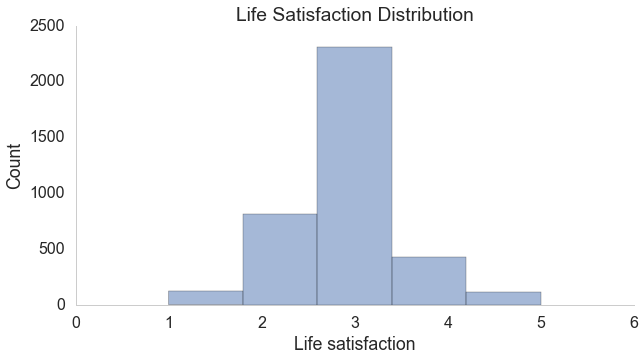

In [76]:
plt.figure(figsize=(10,5))
plt.hist(final_p3['life_satis'], alpha=0.5, bins=5)

##below are some settings to make the plot prettier
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)  
 
plt.ylim(0, 2500)    
plt.xlim(0, 6)   
plt.xlabel('Life satisfaction')
plt.ylabel('Count')
plt.title("Life Satisfaction Distribution")

plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")    
plt.grid(False)
plt.show()

In [77]:
# Create a list containing the continuous features which are standardizable
STANDARDIZABLE = ['age','night_sleeping_time', 'day_nap_time','n_smoke_daily','beer_amt', 'i_crops', 'i_livestock', 'i_products', 'i_business','week_food_buy', 'week_expend_food_own', 'week_alcohol_tobacco', 'month_communication', 'month_utilities', 'month_fuels', 'month_servants', 'month_transportation', 'month_dailyitems', 'month_entertainment', 'year_clothing', 'year_travel', 'year_heating', 'year_goods', 'year_education', 'year_medicine', 'year_fitness', 'year_beauty', 'year_automobile', 'year_repair', 'year_management', 'year_tax', 'year_donation', 'last_yr_h_income', 'year_total_expend','year_expend_food','engel_coe', 'alc_tbc_coe', 'med_coe',  'cash_at_home', 'deposit', 'income_year', 'savings', 'n_older_bro', 'n_younger_bro', 'n_older_sis', 'n_younger_sis', 'child_residence_distance','n_bro','n_sis','n_siblings']

In [78]:
# Create a list containing the categorical features
whole_name_list=list(final_p3.columns.values)
INDICATORS = [x for x in whole_name_list if (x not in STANDARDIZABLE and x!='life_satis' ) ]

/Users/sj/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/Users/sj/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


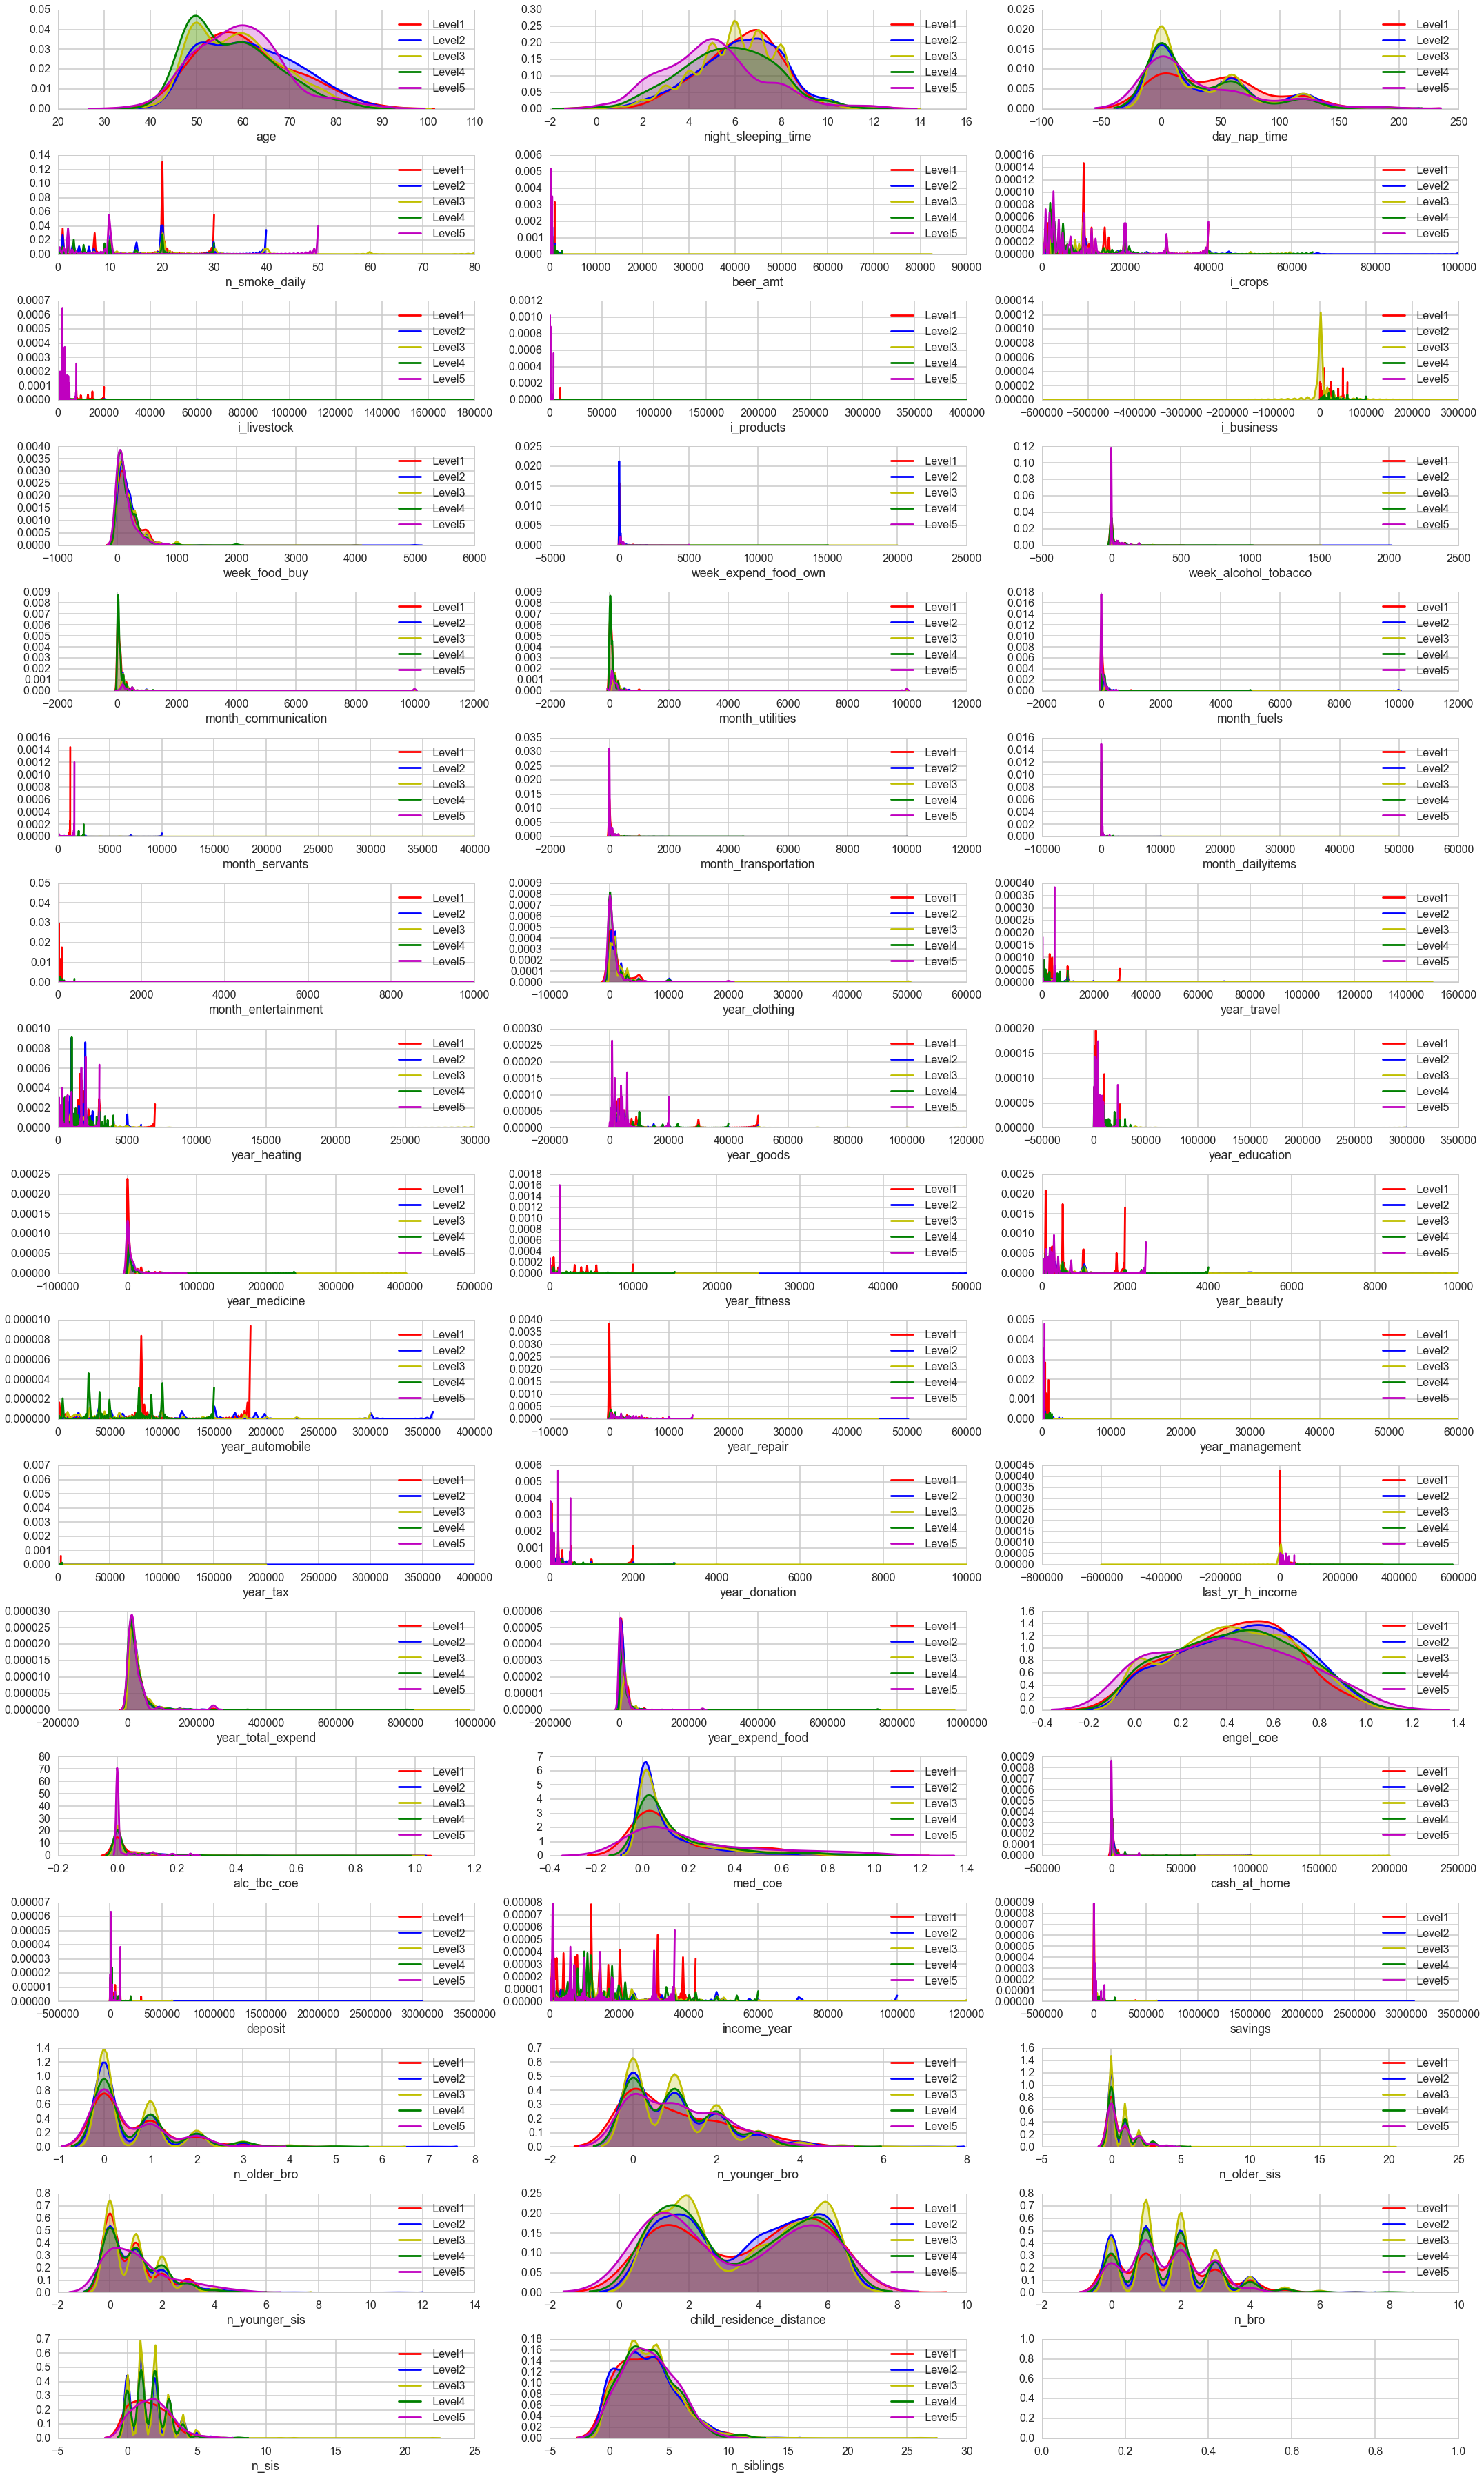

In [79]:
# plot for continuous data to explore possible association
fig, axes = plt.subplots(nrows=17, ncols=3, figsize=(30, 50),
                         tight_layout=True)
for axi, i in zip(axes.ravel(), STANDARDIZABLE):
    sns.kdeplot(final_p3[final_p3['life_satis']==1][i],color='r',shade=True,ax=axi,label=' Level1')
    sns.kdeplot(final_p3[final_p3['life_satis']==2][i],color='b',shade=True,ax=axi,label=' Level2')
    sns.kdeplot(final_p3[final_p3['life_satis']==3][i],color='y',shade=True,ax=axi,label=' Level3')
    sns.kdeplot(final_p3[final_p3['life_satis']==4][i],color='g',shade=True,ax=axi,label=' Level4')
    sns.kdeplot(final_p3[final_p3['life_satis']==5][i],color='m',shade=True,ax=axi,label=' Level5')

    axi.legend(loc='upper right')
    axi.set_xlabel(i)

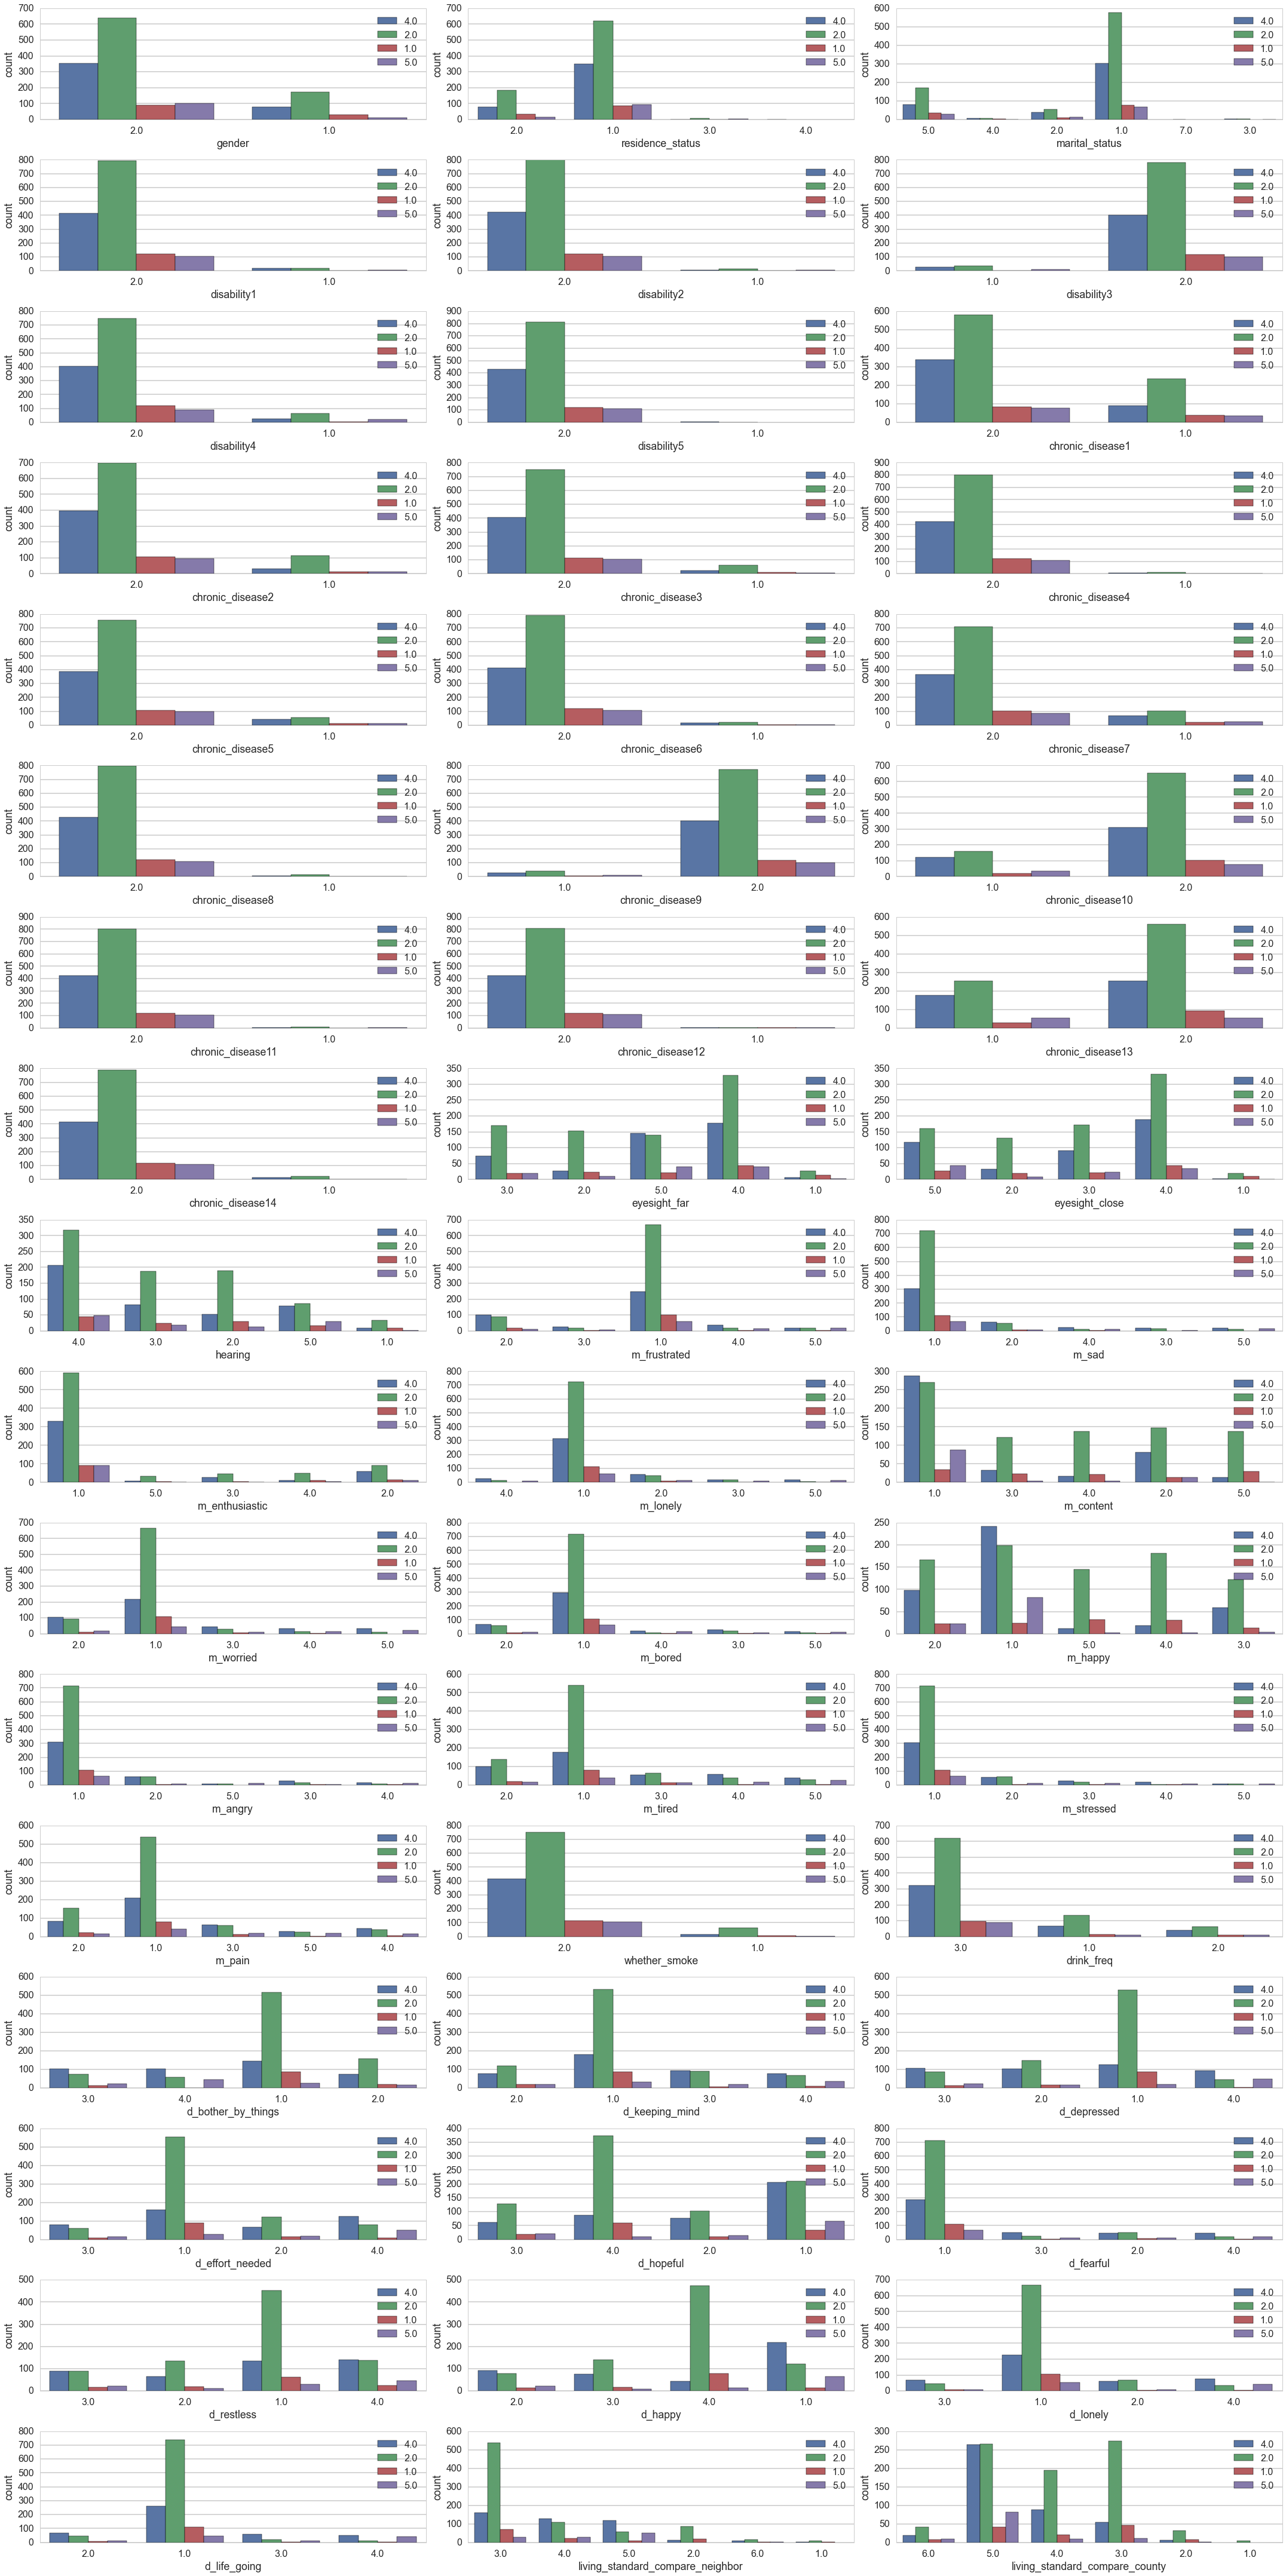

In [80]:
# plot for categorical features to explore possible association
final_p3_temp=final_p3[final_p3['life_satis']!=3]
fig, axes = plt.subplots(nrows=17, ncols=3, figsize=(30, 60),
                         tight_layout=True)
for ax, i in zip(axes.ravel(), INDICATORS):
    sns.countplot(final_p3_temp[i],hue=final_p3_temp.life_satis, ax=ax)
    ax.legend(loc='upper right')
    ax.set_xlabel(i)



In the KDE plots we’re looking for variables with very little overlap between the positive and negative results. It seems that for YEAR-HEATING and YEAR-DONATION, level 1 people have more expenditure while level 5 people have less expenditure.  

For the histograms (indicator variables) we’re looking for variables that put nearly all data points of one class on one value. M-HAPPY and M-CONTENT have nearly all the level5 cases on 1. So those features could have association with the response.

<a id='3.1.2'></a>
### 3.1.2 Univariate analysis
Next, we did multinomial logistic regression on each feature to analysis the possible association without any other control. The function below generated two dataframs which contained the p value and coefficient of each univariate analysis. 

In [81]:
"""
Function
--------
uni_pvalue_coef

Inputs
------
varlist : list
   The independent variable names of interest for univariate multinomial logstic regression
df :  dataframe
   dataframe of interest, including the independent variables and dependent variables
   
Returns
-------
  p_df : dataframe 
      index: ind. var. names
      columns: p values for each level;
      rows: each feature
  coef_df : dataframe
      index: ind. var. names
      columns: beta coefficients for each level; 
      rows: feature
"""

def uni_pvalue_coef(varlist, df):
    for var_i in range(len(varlist)):
        var=varlist[var_i]
       
        if var_i==0:
            unvi_df = df[df[var].notnull() & df['life_satis'].notnull()]
            mdl = st.MNLogit(unvi_df['life_satis'], unvi_df[var])
            mdl_fit =mdl.fit()
            
            p_df=mdl_fit.pvalues
            coef_df=mdl_fit.params
        else:   
            unvi_df = df[df[var].notnull()&df['life_satis'].notnull()]
            mdl = st.MNLogit(unvi_df['life_satis'], unvi_df[var])
            mdl_fit =mdl.fit()
            
            new_row_p=mdl_fit.pvalues
            new_row_coef=mdl_fit.params
            p_df= p_df.append(new_row_p)
            coef_df=coef_df.append(new_row_coef)
            
    return p_df,coef_df 

In [82]:
%%capture
#univariate logistic regression for each feature

whole_name_list=[x for x in final_p3.columns.values if x != 'life_satis']
pvalue_df, coef_df=uni_pvalue_coef(whole_name_list,final_p3) 

In [83]:
pvalue_df

0              1             2             3
gender                            1.687293e-81  1.151824e-196  4.556084e-36  9.402599e-01
residence_status                  9.149763e-83  3.836388e-190  2.887524e-33  8.693274e-02
marital_status                    2.839303e-70  3.361032e-113  6.497898e-36  2.092453e-01
disability1                       1.105903e-84  5.322304e-217  3.870801e-34  3.309562e-01
disability2                       1.321395e-84  1.620816e-218  1.375847e-34  3.178539e-01
disability3                       4.402398e-84  1.010258e-215  8.675986e-34  2.934318e-01
disability4                       1.049811e-82  1.128779e-214  3.191908e-34  1.784866e-01
disability5                       6.092148e-85  6.628211e-220  1.538075e-34  4.308620e-01
chronic_disease1                  2.885490e-79  1.519815e-194  1.431022e-36  4.270482e-01
chronic_disease2                  2.965634e-81  1.852130e-209  1.615260e-35  4.176602e-01
chronic_disease3                  3.361279e-83  6.608698e-213  5.849651e-35  4.714762e-01
chronic_disease4                  1.518518e-84  4.951099e-219  1.409097e-34  3.896814e-01
chronic_disease5                  3.452082e-84  3.833686e-211  3.067463e-34  4.437878e-01
chronic_disease6                  1.308965e-84  3.278143e-216  2.175621e-34  3.829799e-01
chronic_disease7                  7.976962e-83  1.869053e-206  4.405080e-34  3.090356e-01
chronic_disease8                  1.559796e-84  2.427041e-218  1.015836e-34  4.272406e-01
chronic_disease9                  3.060054e-84  1.180917e-213  4.364373e-34  3.392004e-01
chronic_disease10                 7.983628e-82  1.680035e-200  1.687213e-31  1.365254e-01
chronic_disease11                 1.148537e-84  5.358834e-219  1.653737e-34  3.896814e-01
chronic_disease12                 4.831351e-85  1.894941e-218  9.173476e-35  4.270528e-01
chronic_disease13                 2.204590e-80  5.909226e-193  1.562837e-30  3.654155e-02
chronic_disease14                 2.865586e-84  1.927159e-217  2.576155e-34  4.234282e-01
eyesight_far                      9.913638e-77  2.329850e-186  8.511351e-42  4.884578e-01
eyesight_close                    6.161718e-78  3.113290e-192  1.224698e-38  7.431684e-01
hearing                           5.797028e-76  4.504453e-189  4.063272e-39  6.264245e-01
m_frustrated                      2.092603e-81  9.839863e-155  6.788467e-59  6.254452e-06
m_sad                             1.576824e-86  7.059022e-170  1.341351e-57  1.156375e-05
m_enthusiastic                    1.714915e-93  1.139012e-162  5.575519e-36  1.118531e-02
m_lonely                          3.242351e-87  8.233959e-170  1.572894e-57  2.227838e-06
m_content                         8.182769e-80  5.553063e-141  8.098238e-12  1.604751e-14
...                                        ...            ...           ...           ...
year_education                    9.940203e-17   2.141081e-21  2.856562e-12  7.614413e-02
year_medicine                     2.465643e-34   2.159919e-42  4.991049e-27  1.611715e-02
year_fitness                      2.243741e-04   7.376104e-05  7.778770e-02  1.003437e-03
year_beauty                       4.340950e-09   4.201176e-12  4.069266e-02  1.101282e-02
year_automobile                   4.072963e-03   1.250933e-03  1.307570e-01  9.997739e-01
year_repair                       1.026729e-17   2.075556e-25  6.571900e-06  1.684986e-01
year_management                   3.274790e-07   7.933722e-11  8.982098e-04  3.575573e-03
year_tax                                   NaN            NaN           NaN           NaN
year_donation                     1.028846e-06   1.093839e-08  9.441495e-02  2.859068e-04
last_yr_h_income                  3.385466e-23   8.522962e-30  3.742891e-10  5.982307e-01
year_total_expend                 5.059348e-75  3.416123e-106  1.119178e-36  2.337539e-01
year_expend_food                  7.163270e-65  4.504650e-100  3.717768e-37  3.500738e-01
engel_coe                         7.599547e-70  8.597411e-143  4.493267e-31  2.513445


The above results shows that p values of most of the features are less than 0.05，which indicates that the features are significant without controlling for other variables. But the result may change if we adjust for some other variables. Hence, in the next part, we first do feature selection and then run the final model including candidate varaibles.


<a id='3.2'></a>
## 3.2 Feature selection and model building

In [84]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.linear_model import lasso_stability_path
import sklearn.linear_model as lm
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

In this part, L1-recovery with the Lasso for linear model was first used to select important features, and then the selected important features would be used to fit the final model.

First, to see the selection trend, let's plot the Lasso Satbility Path for the whole dataset without subsampling.

<a id='3.2.1'></a>
### 3.2.1 Feature Selection without subsampling, Lasso Stability Path

In [85]:
X = np.array(final_p3.iloc[:, final_p3.columns != 'life_satis']);
X = sklearn.preprocessing.scale(X)
y = np.array(final_p3['life_satis'])

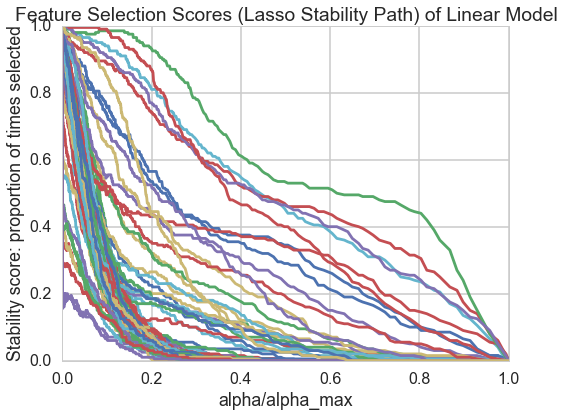

In [86]:
## plot the Lasso Stability Path based on the merged dataset
alpha_grid, scores_path = lm.lasso_stability_path(X, y, n_grid = 1000);

mpl.rcParams['figure.figsize']=(8.0,6.0)
plt.figure()
hg = plt.plot(alpha_grid, scores_path.T)
plt.xlabel('alpha/alpha_max')
plt.ylabel('Stability score: proportion of times selected')
plt.title('Feature Selection Scores (Lasso Stability Path) of Linear Model')
plt.savefig("Figure1.pdf")
plt.show()


If the features are more robust against penalty, the features would be more revelant to our response. The above plot showed that the feature represented by green line is most robust against penalty. There are also around 4 lines relatively close to the green line that are quite robust. More to the lower left of the green line, several yellow and blues lines cross over in the middle, which may be also important. The rest of the lines, relatively not important, crowed over in the left bottom. Thus, in the below model fit, it would be appropriate to keep about 10-15 top ranking features.



<a id='3.2.2'></a>
### 3.2.2 Feature selection with subsampling (Lasso approach)

The idea of selecting the most important features is to calculate the area under the path line by intergral. To realize it, we set the n-grid of lasso_stability_path to 1000, sum over the value of scores_path (the value of y axis) across the 1000 grids of each line (i.e. each feature), and devide by n-grid (1000) , which may be a representative of the feature imporantance score. 

To overcome the problem of overfitting, we performed feature selection with subsampling randomly with 70% each time, did stardardization in the subsample, and took the mean of the n times subsampling scores.


In [239]:
"""
Function
--------
feature_selection

Inputs
------
df : dataframe
   The input dataframe
subsample_n :  int
   The times of subsampling randomly
   
Returns
-------
  var_imp : dataframe 
      columns[0]: variable names
      columns[1:] the feature importance scores in each time subsampling
      row: variable names
  
"""

def feature_selection(df, subsample_n):
    for i in range(subsample_n):
        #subsampling
        iused, ileft = train_test_split(xrange(df.shape[0]), train_size=0.7)
        dfused=df.iloc[iused,:]
        dfused_c=dfused.copy()
        #standarization
        for col in STANDARDIZABLE:
            scaler=StandardScaler().fit(dfused[col])
            out=scaler.transform(dfused[col])
            dfused_c[col]=out
        #set X, y and do lasso_stability_path    
        X = np.array(dfused_c.iloc[:, dfused_c.columns != 'life_satis']);
        y = np.array(dfused_c['life_satis'])
        alpha_grid, scores_path = lm.lasso_stability_path(X, y, n_grid = 1000)

        # create a list containing the feature importance score
        feature_importance = scores_path.sum(axis= 1)/len(alpha_grid)
        imp_list = []
        for t in range(len(feature_importance)):
            imp_list.append(np.mean(feature_importance[t]))

        # create a dataframe to store the importance scores of each time subsampling
        if i==0:
            varnames = dfused_c.drop(['life_satis'],axis =1).columns
            var_imp = pd.DataFrame(varnames)
            var_imp.columns = ["variable"]

            var_imp['importance 1'] = imp_list
        else:
            var_imp['importance %s' % (i+1)] = imp_list
    return var_imp

In [88]:
final_mul=feature_selection(final_p3, 5)
final_mul.head()

variable  importance 1  importance 2  importance 3  importance 4  importance 5
0            gender      0.229256      0.333781      0.322958      0.381370      0.371913
1  residence_status      0.709824      0.726056      0.714094      0.733875      0.698432
2    marital_status      0.725377      0.667131      0.704976      0.720518      0.693353
3       disability1      0.307326      0.562980      0.246802      0.478267      0.578787
4       disability2      0.514976      0.473033      0.337397      0.282495      0.478240

In [89]:
#calculate the mean of scores and sort according to the mean value
final_mul['mean']=final_mul.iloc[:,1:].mean(axis=1)
final_mul=final_mul.sort('mean', ascending = 0)
final_mul.head(20)

variable  importance 1  importance 2  importance 3  importance 4  importance 5      mean
87     living_standard_compare_county      0.978124      0.979060      0.978826      0.981190      0.977589  0.978958
86   living_standard_compare_neighbor      0.947786      0.954554      0.954952      0.949920      0.951913  0.951825
22                       eyesight_far      0.926386      0.930053      0.919175      0.908496      0.921514  0.921125
24                            hearing      0.869667      0.911473      0.907426      0.912874      0.920700  0.904428
42                 d_bother_by_things      0.880455      0.897716      0.886496      0.861683      0.885084  0.882287
30                          m_worried      0.876675      0.873445      0.868500      0.848132      0.872628  0.867876
51                       d_life_going      0.837635      0.863973      0.850762      0.859746      0.821317  0.846687
23                     eyesight_close      0.761048      0.825739      0.885968      0.816947      0.921440  0.842228
45                    d_effort_needed      0.794946      0.839674      0.860767      0.846614      0.852599  0.838920
29                          m_content      0.826562      0.822543      0.812982      0.840209      0.827643  0.825988
100                               age      0.811166      0.820341      0.816184      0.820344      0.811933  0.815993
32                            m_happy      0.814055      0.815149      0.828547      0.797181      0.802678  0.811522
49                            d_happy      0.807801      0.810480      0.807555      0.813889      0.799122  0.807770
50                           d_lonely      0.789912      0.820619      0.835839      0.805309      0.770621  0.804460
44                        d_depressed      0.830646      0.801867      0.693159      0.789577      0.823447  0.787739
31                            m_bored      0.771366      0.573824      0.794942      0.778551      0.752249  0.734186
9                    chronic_disease2      0.698139      0.732385      0.728523      0.733292      0.690104  0.716489
1                    residence_status      0.709824      0.726056      0.714094      0.733875      0.698432  0.716456
2                      marital_status      0.725377      0.667131      0.704976      0.720518      0.693353  0.702271
46                          d_hopeful      0.655705      0.738436      0.727325      0.689128      0.663950  0.694909

In [90]:
final_mul.to_csv("Part3_Feature ranking.csv",index=False)

In part 5 we will compare the selected features with logistic regression methods. 

<a id='3.2.3'></a>
### 3.2.3 Model building: linear regression and multinomial logistic regression


It's time to fit the final model and analysis the association!

Since our feature was selected by linear model with Lasso, we used linear regression to fit a final model. In the end, we also tried to fit a multinomial logistic model.

In [91]:
first_i=final_mul['variable'][0:15]

est = st.OLS(final_p3['life_satis'], final_p3[first_i])
est_fit =est.fit()
est_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             life_satis   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     4231.
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        22:50:44   Log-Likelihood:                -4059.6
No. Observations:                3784   AIC:                             8149.
Df Residuals:                    3769   BIC:                             8243.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
living_standard_compare_county       0.1306      0.011     11.499      0.000         0.108     0.153
living_standard_compare_neighbor     0.1800      0.013     13.387      0.000         0.154     0.206
eyesight_far                         0.0570      0.013      4.437      0.000         0.032     0.082
hearing                              0.0667      0.013      5.282      0.000         0.042     0.092
d_bother_by_things                   0.0853      0.013      6.408      0.000         0.059     0.111
m_worried                            0.0827      0.013      6.275      0.000         0.057     0.109
d_life_going                         0.1038      0.018      5.761      0.000         0.068     0.139
eyesight_close                       0.0860      0.013      6.851      0.000         0.061     0.111
d_effort_needed                      0.0080      0.013      0.638      0.524        -0.017     0.033
m_content                           -0.0469      0.011     -4.372      0.000        -0.068    -0.026
age                                  0.0089      0.001      8.834      0.000         0.007     0.011
m_happy                             -0.0235      0.011     -2.074      0.038        -0.046    -0.001
d_happy                             -0.0004      0.011     -0.036      0.971        -0.021     0.020
d_lonely                             0.0458      0.015      3.065      0.002         0.016     0.075
d_depressed                          0.0277      0.015      1.817      0.069        -0.002     0.058
==============================================================================
Omnibus:                       64.942   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.080
Skew:                          -0.187   Prob(JB):                     1.37e-21
Kurtosis:                       3.685   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In part 5 we will interpret this regression result by comparing with logistic regression model. 
    
    

Next, we tried to use the top15 important variables to fit a multinomial model

In [92]:
mdl = st.MNLogit(final_p3['life_satis'], final_p3[first_i])
mdl_fit =mdl.fit()
mdl_fit.summary()

Optimization terminated successfully.
         Current function value: 0.942665
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             life_satis   No. Observations:                 3784
Model:                        MNLogit   Df Residuals:                     3724
Method:                           MLE   Df Model:                           56
Date:                Wed, 09 Dec 2015   Pseudo R-squ.:                  0.1372
Time:                        22:50:44   Log-Likelihood:                -3567.0
converged:                       True   LL-Null:                       -4134.1
                                        LLR p-value:                1.107e-200
====================================================================================================
                    life_satis=2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
living_standard_compare_county       0.0401      0.093      0.431      0.666        -0.142     0.223
living_standard_compare_neighbor     0.0062      0.124      0.050      0.960        -0.237     0.249
eyesight_far                         0.1291      0.100      1.288      0.198        -0.067     0.325
hearing                             -0.0917      0.101     -0.905      0.366        -0.290     0.107
d_bother_by_things                   0.2159      0.142      1.518      0.129        -0.063     0.495
m_worried                            0.2529      0.190      1.333      0.183        -0.119     0.625
d_life_going                        -0.0020      0.233     -0.008      0.993        -0.459     0.455
eyesight_close                       0.0665      0.097      0.686      0.493        -0.124     0.257
d_effort_needed                     -0.0175      0.125     -0.140      0.888        -0.262     0.227
m_content                           -0.1099      0.080     -1.367      0.172        -0.267     0.048
age                                  0.0168      0.008      1.985      0.047         0.000     0.033
m_happy                             -0.0926      0.089     -1.043      0.297        -0.267     0.081
d_happy                              0.0924      0.095      0.972      0.331        -0.094     0.279
d_lonely                            -0.0515      0.156     -0.330      0.741        -0.357     0.254
d_depressed                          0.0615      0.156      0.394      0.693        -0.244     0.367
----------------------------------------------------------------------------------------------------
                    life_satis=3       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
living_standard_compare_county       0.1806      0.091      1.991      0.046         0.003     0.358
living_standard_compare_neighbor     0.2417      0.120      2.010      0.044         0.006     0.477
eyesight_far                         0.2064      0.098      2.113      0.035         0.015     0.398
hearing                              0.0631      0.099      0.637      0.524        -0.131     0.257
d_bother_by_things                   0.3673      0.138      2.657      0.008         0.096     0.638
m_worried                            0.3286      0.186      1.771      0.077        -0.035     0.692
d_life_going                         0.0961      0.226      0.425      0.670        -0.347     0.539
eyesight_close                       0.1836      0.095      1.938      0.053        -0.002     0.369
d_effort_needed                      0.0345      0.121      0.286      0.775        -0.202     0.271
m_content                           -0.2327      0.078     -2.967      0.003        -0.386    -0.079
age                                  0.0035      0.008      0.429      0.668        -0.013     0.020
m_happy  

### `Important note: the association analysis of the above results was shown in Part 5 with comparison with the results of Part 4. Please see our analysis later in Part 5.`

<a id='part4'></a>
## Part 4 Analysis for life satisfaction association using binary data (final_i dataset)

In this part, the procedure is pretty similar to what we did in part 3. The main difference is that we used the binary data (final_i) generated in part2 to do the association analysis between life satisfaction and possible features. The response variable in this part is satis_i, of which 1 indicates "satisfied" and 0 indicates "not satisfied". 

First, we did some exploratory data analysis by making a kernel-density estimate plot of each feature in STANDARDIZEBLE and a histogram for each feature in INDICATORS to see promising features as separators. Second, logistic regression was carried out for each variable to get a sense of the possible association without controlling for other variables. Next, we used L1-recovery with the Lasso in logistic regression(also considered subsampling randomly to overcome overfitting) to perform feature selection. Finally, the top 15 features are kept to fit a final logistic regression model to analysis the association.

In [93]:
final_p4 = pd.read_csv("final_i.csv")
del final_p4['bornyear'] #the bornyear is totally correlated with age, we drop bornyear variable.
del final_p4['life_satis'] # since we use binary variable 'satis_i' 

## 4.1 Explonary data analysis

<a id='4.1.1'></a>
### 4.1.1 Plot analysis

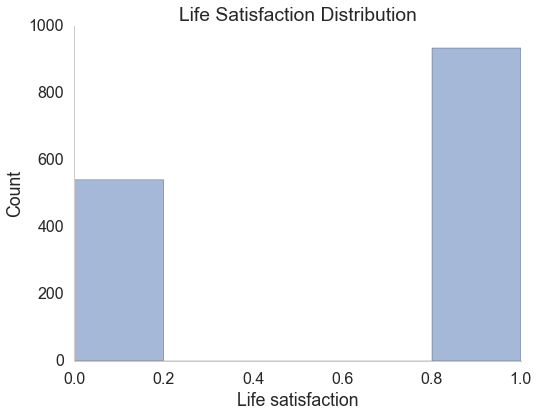

In [94]:
plt.figure(figsize=(8,6))
plt.hist(final_p4['satis_i'], alpha=0.5, bins=5)

##below are some settings to make the plot prettier
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)  
 
plt.ylim(0, 1000)    
plt.xlim(0, 1)   
plt.xlabel('Life satisfaction')
plt.ylabel('Count')
plt.title("Life Satisfaction Distribution")

plt.tick_params(axis="both", which="both", bottom="on", top="off",    
                labelbottom="on", left="on", right="off", labelleft="on")    
plt.grid(False)
plt.show()

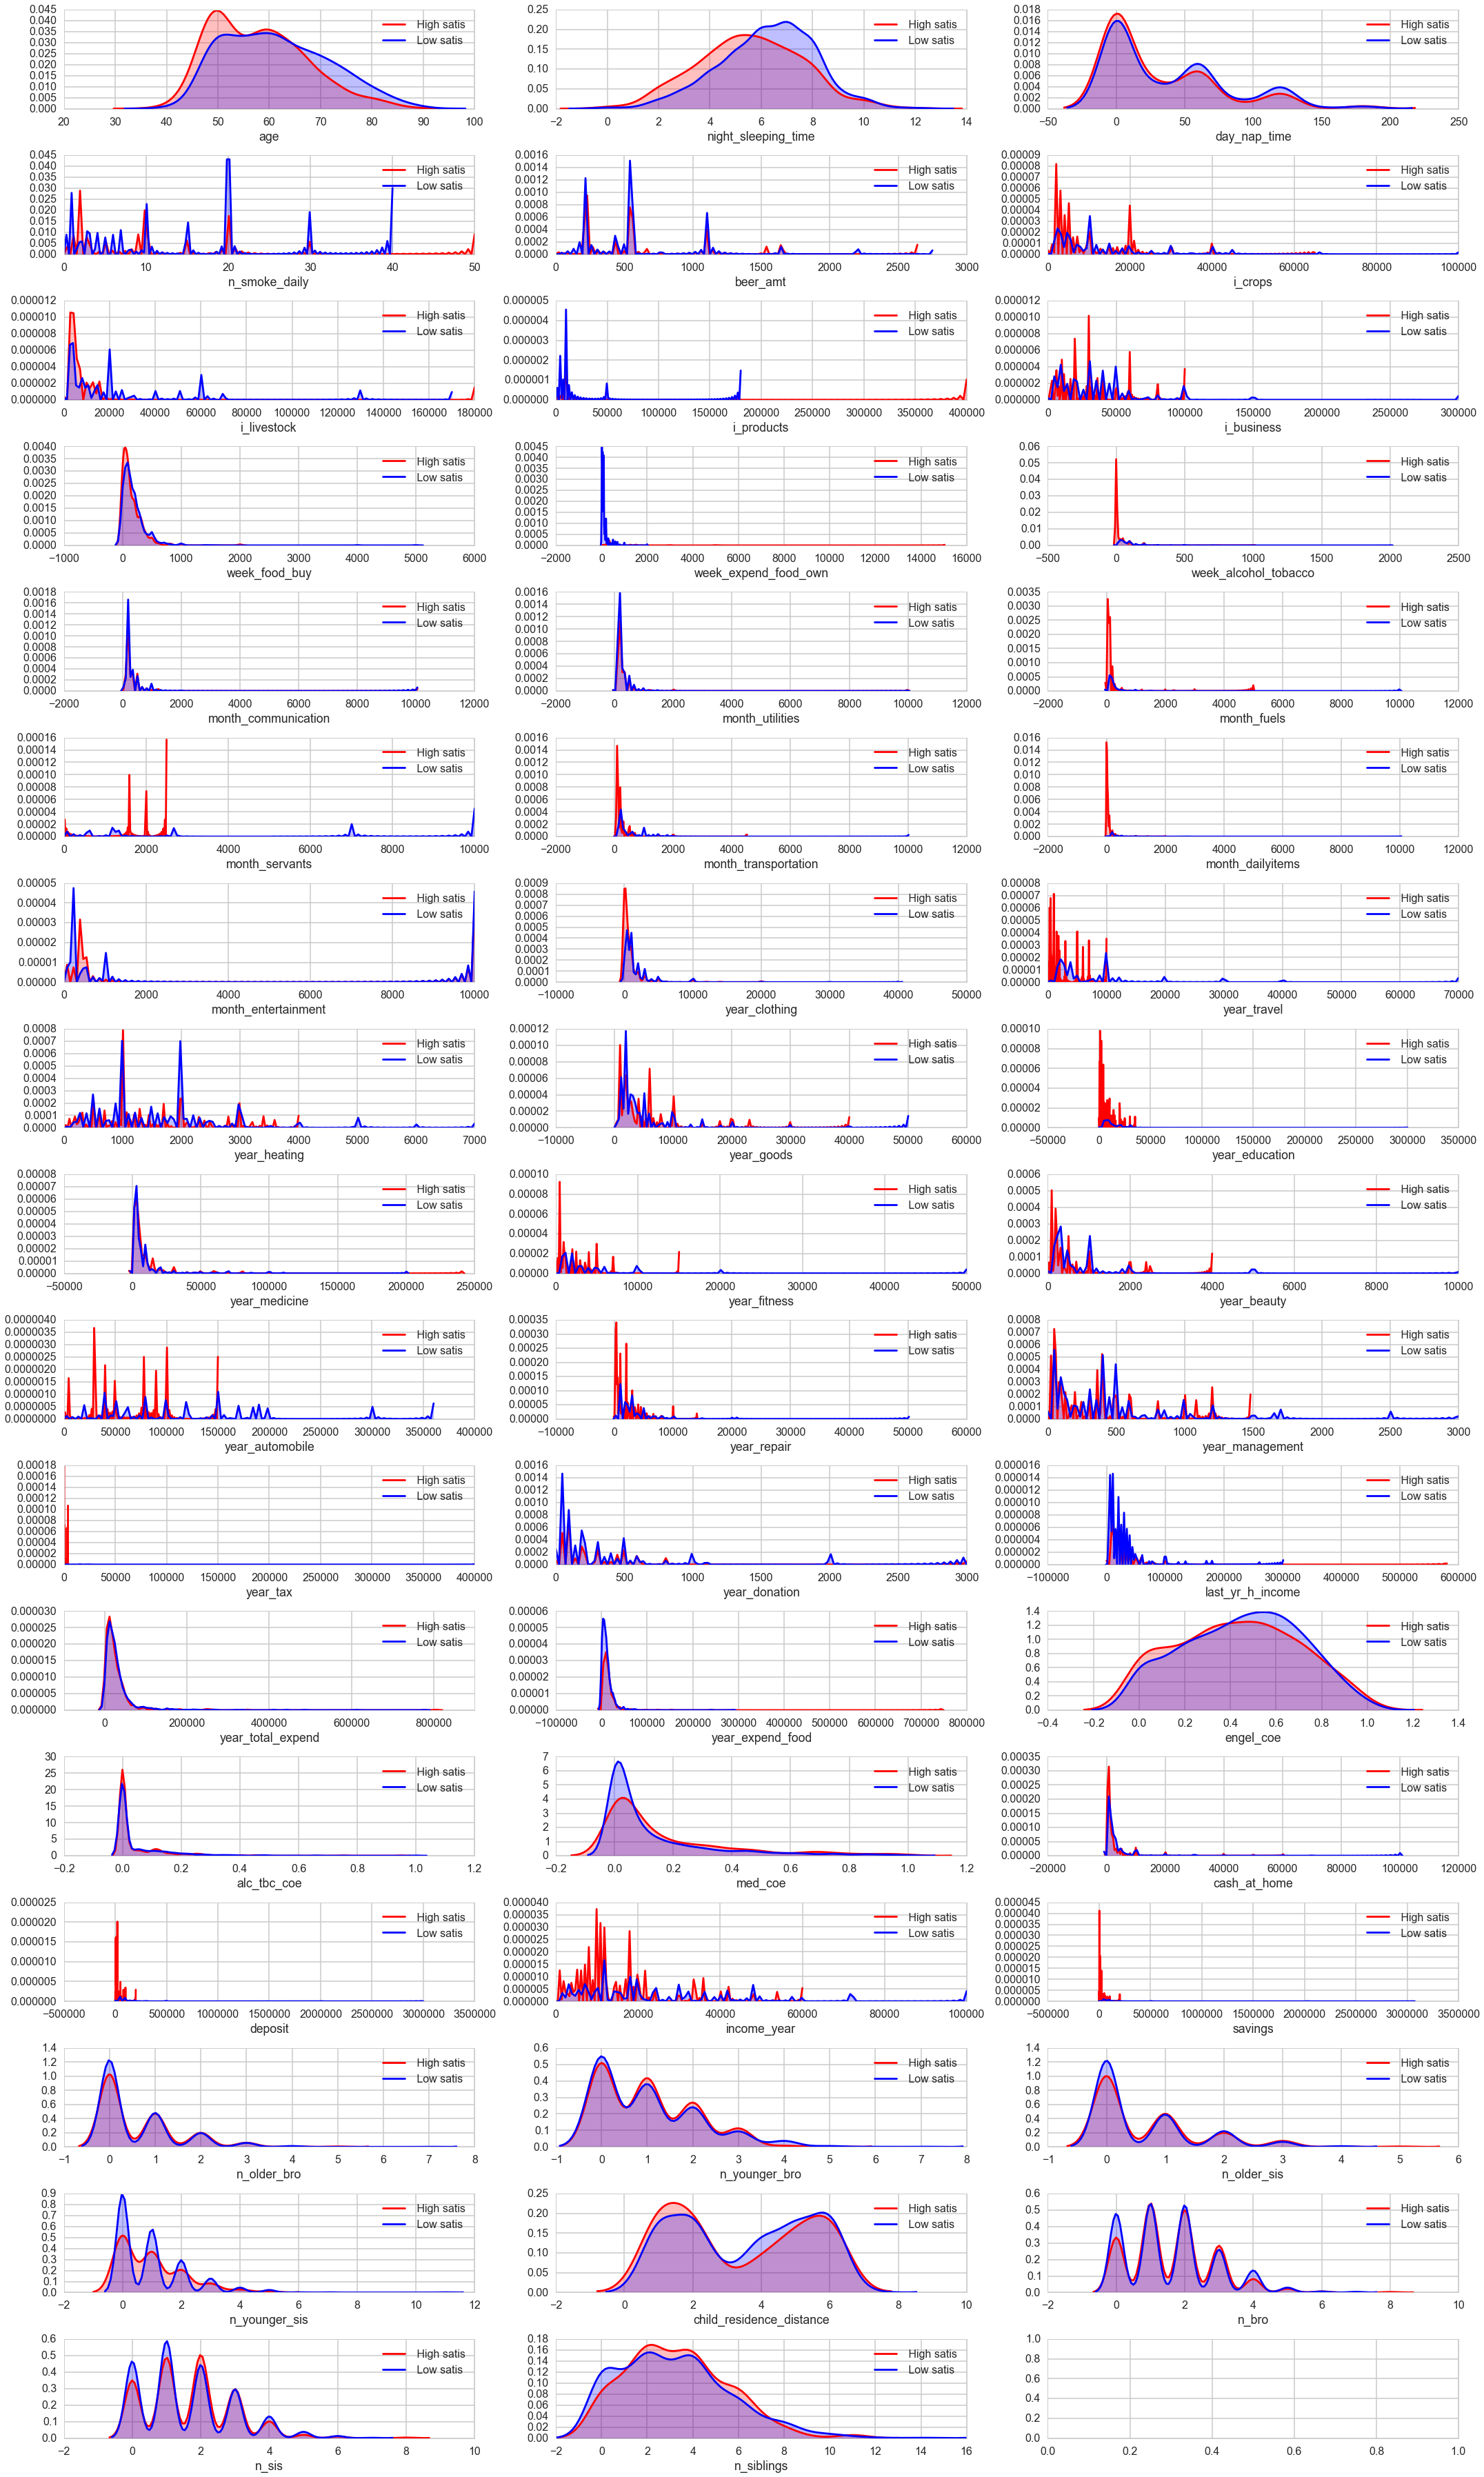

In [95]:
fig, axes = plt.subplots(nrows=17, ncols=3, figsize=(30, 50),
                         tight_layout=True)
for axi, i in zip(axes.ravel(), STANDARDIZABLE):
    sns.kdeplot(final_p4[final_p4['satis_i']==0][i],color='r',shade=True,ax=axi,label=' High satis')
    sns.kdeplot(final_p4[final_p4['satis_i']==1][i],color='b',shade=True,ax=axi,label=' Low satis')
    axi.legend(loc='upper right')
    axi.set_xlabel(i)

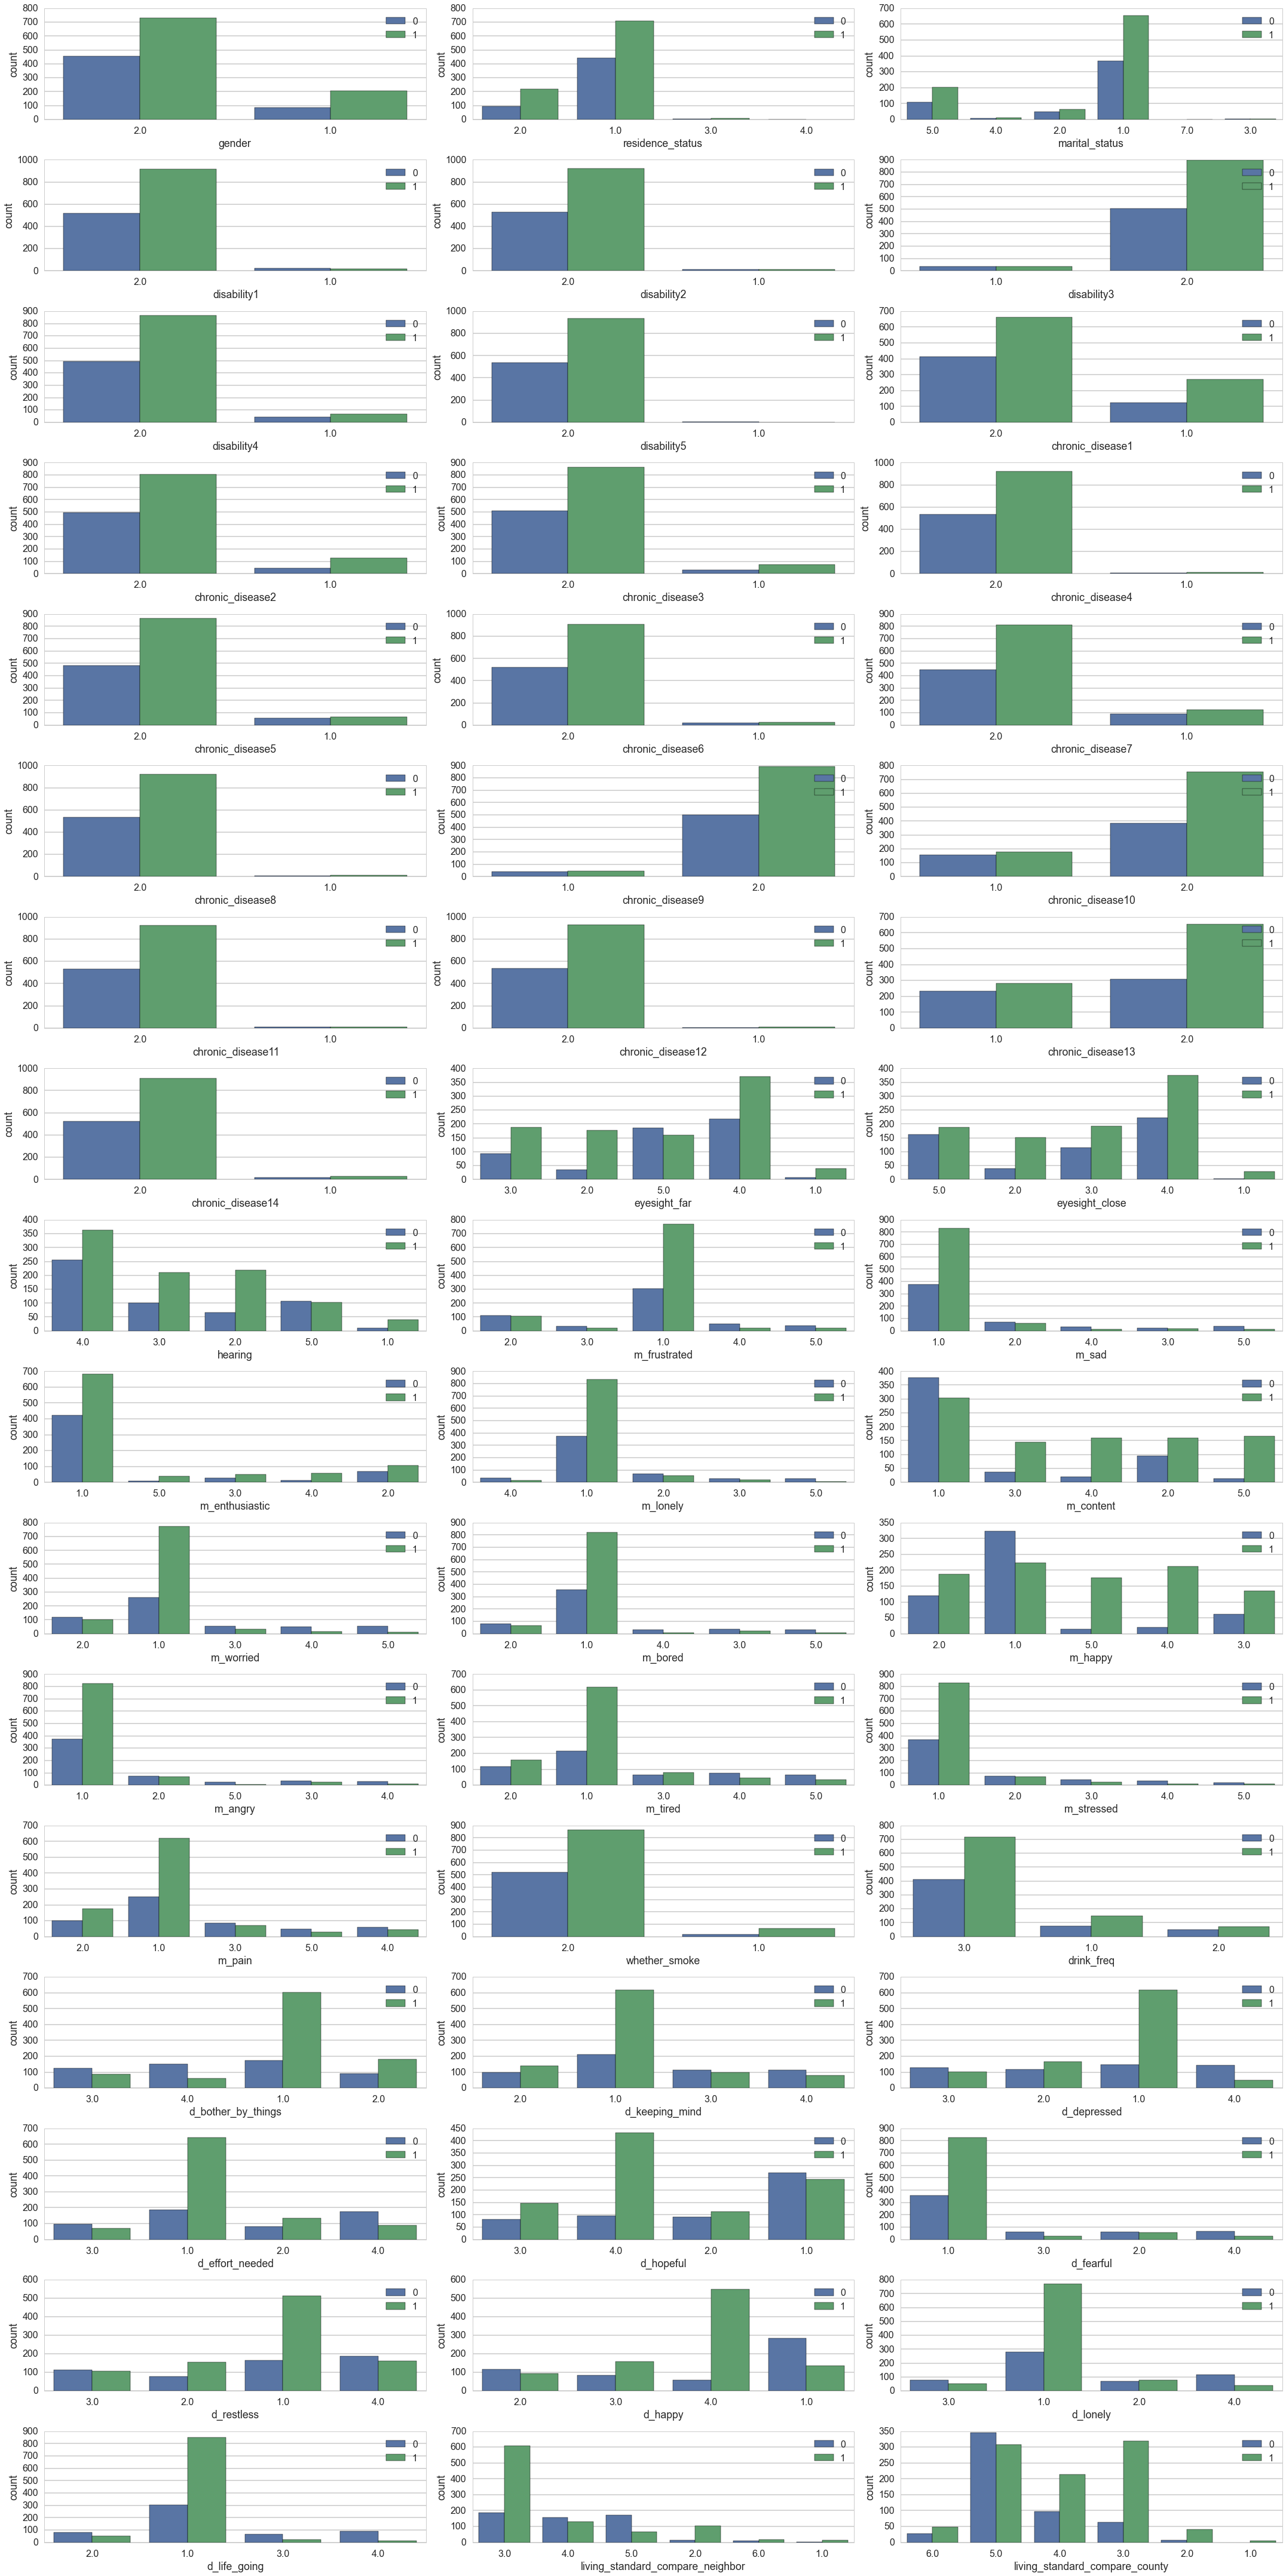

In [96]:
fig, axes = plt.subplots(nrows=17, ncols=3, figsize=(30, 60),
                         tight_layout=True)
for ax, i in zip(axes.ravel(), INDICATORS):
    sns.countplot(final_p4[i],hue=final_p4.satis_i, ax=ax)
    ax.legend(loc='upper right')
    ax.set_xlabel(i)


Same analysis method as we did in part 3. The density curves showed that MONTH-SERVATN could be relavent with response since for two levels of response, the curves did not have much overlay. The histgram figures showed that for chronic disease 10 indicator, among the subjects with or without the disease 10, the percentage of satisfied level is quite different, which indicates chronic disease 10 might be relevant with response.

<a id='4.1.2'></a>
### 4.1.2 Univariate analysis
 

Next, for each variable, we run a logistic regression to get a sense of the assocation.

In [97]:
"""
Function
--------
uni_logit_pvalue_coef

Inputs
------
varlist : list
   The independent variable names of interest for univariate logstic regression
df :  dataframe
   dataframe of interest, including the independent variables and dependent variables
   
Returns
-------
  p_coef_df : dataframe
      column index: p values and coefficient

"""

def uni_logit_pvalue_coef(varlist, df):
    p_list=[]
    coef_list=[]
    for var in varlist:
        unvi_df = df[df[var].notnull() & df['satis_i'].notnull()]
        mdl = st.Logit(unvi_df['satis_i'], unvi_df[var])
        mdl_fit =mdl.fit()
        p_=float(mdl_fit.pvalues)
        p_list.append(p_)
        coef_=float(mdl_fit.params)
        coef_list.append(coef_)
    
    p_coef_df =pd.DataFrame(varlist)
    p_coef_df.columns = ["variable"]
    
    p_coef_df['pvalue']=p_list
    p_coef_df['coef']=coef_list
    

    return p_coef_df

In [98]:
%%capture
whole_name_list=[x for x in final_p4.columns.values if x != 'satis_i']
p_coef_df=uni_logit_pvalue_coef(whole_name_list,final_p4)
p_coef_df

variable        pvalue      coef
0                              gender  7.725656e-21  0.273537
1                    residence_status  6.526012e-25  0.439631
2                      marital_status  2.050258e-15  0.174453
3                         disability1  5.865991e-25  0.282558
4                         disability2  1.761264e-24  0.278112
5                         disability3  4.940499e-25  0.285500
6                         disability4  3.626116e-24  0.282835
7                         disability5  2.516314e-24  0.275293
8                    chronic_disease1  2.099788e-20  0.279725
9                    chronic_disease2  1.638535e-21  0.268926
10                   chronic_disease3  4.198068e-23  0.274842
11                   chronic_disease4  3.447053e-24  0.275738
12                   chronic_disease5  6.225140e-25  0.288915
13                   chronic_disease6  1.587536e-24  0.279865
14                   chronic_disease7  7.315477e-25  0.296223
15                   chronic_disease8  6.721858e-24  0.273745
16                   chronic_disease9  8.816531e-25  0.284471
17                  chronic_disease10  4.907684e-27  0.323020
18                  chronic_disease11  2.400933e-24  0.276697
19                  chronic_disease12  2.523930e-24  0.276029
20                  chronic_disease13  4.507943e-28  0.351506
21                  chronic_disease14  3.123320e-24  0.277840
22                       eyesight_far  2.292069e-13  0.102428
23                     eyesight_close  1.932327e-16  0.114751
24                            hearing  1.993865e-14  0.113578
25                       m_frustrated  5.191716e-03  0.079948
26                              m_sad  1.119898e-03  0.104277
27                     m_enthusiastic  6.844601e-24  0.334866
28                           m_lonely  8.874198e-04  0.106985
29                          m_content  2.779190e-52  0.377397
..                                ...           ...       ...
71                     year_education  8.858755e-03  0.000033
72                      year_medicine  6.699113e-02  0.000008
73                       year_fitness  2.185861e-02  0.000173
74                        year_beauty  1.910218e-03  0.000851
75                    year_automobile  1.967277e-02  0.000009
76                        year_repair  1.659583e-06  0.000185
77                    year_management  2.538428e-03  0.001256
78                           year_tax  1.942128e-01  0.000273
79                      year_donation  3.577628e-03  0.001625
80                   last_yr_h_income  8.167545e-04  0.000014
81                  year_total_expend  4.361119e-10  0.000009
82                   year_expend_food  7.326252e-07  0.000018
83                          engel_coe  1.997890e-21  1.019757
84                        alc_tbc_coe  1.325240e-07  2.939132
85                            med_coe  6.487820e-03  0.584268
86   living_standard_compare_neighbor  5.571623e-10  0.091344
87     living_standard_compare_county  9.213152e-14  0.091713
88                       cash_at_home  5.781372e-06  0.000093
89                            deposit  2.835657e-07  0.000021
90                        income_year  9.641063e-04  0.000023
91                            savings  7.337358e-09  0.000023
92                        n_older_bro  4.717687e-06  0.238781
93                      n_younger_bro  3.381168e-12  0.260883
94                        n_older_sis  9.622662e-06  0.221215
95                      n_younger_sis  5.367140e-10  0.231493
96           child_residence_distance  4.601165e-22  0.133077
97                              n_bro  1.322218e-13  0.199043
98                              n_sis  4.866811e-13  0.189437
99                         n_siblings  2.999056e-14  0.104565
100                               age  3.604923e-28  0.009869

[101 rows x 3 columns]

### 4.2 Feature selection and model building

<a id='4.2.1'></a>
### 4.2.1 Model without subsampling, L1-logistic Regression Path


First, plot path with L1-Logistic regression using the whole dataset to get an idea of the number of important features.

In [99]:
# standardize continuous features
final_p4_temp=final_p4.copy()
for col in STANDARDIZABLE:
    scaler=StandardScaler().fit(final_p4_temp[col])
    out=scaler.transform(final_p4_temp[col])
    final_p4_temp[col]=out

In [100]:
#set X, y and do lasso_stability_path   
X = np.array(final_p4_temp.iloc[:, final_p4_temp.columns != 'satis_i'])
y = np.array(final_p4_temp['satis_i'])

In [101]:
# Demo path functions
from sklearn.svm import l1_min_c

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)

# Here we use L1 penalty in the logistic regression
clf = lm.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
coef_l = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coef_l.append(clf.coef_.ravel().copy())

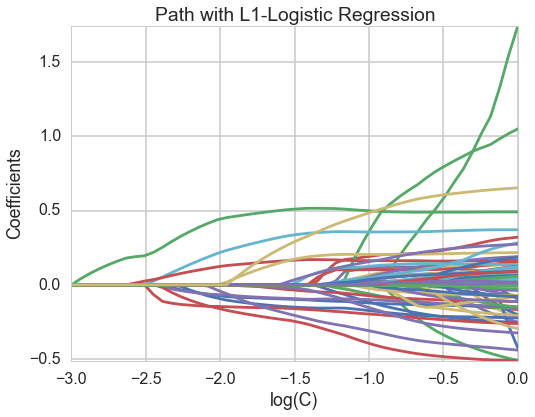

In [102]:
# plot the output
coef_l = np.array(coef_l)
plt.plot(np.log10(cs), coef_l)

ymin, ymax = plt.ylim()   

plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Path with L1-Logistic Regression')
plt.axis('tight')
plt.savefig("Figure2.pdf")
plt.show()


As log(C) increases, more features would be included into the model. The plot clearly showed that the feature marked with green line is the most important one. Several red, purple, and green lines crawled out from the baseline (y=0) as log(C) increases, and they are less important than the green line. In the right part of the figure (x>-1.0), a lot of lines are huddled together and they might not be that important. 

<a id='4.2.2'></a>
### 4.2.2 Feature selection with subsampling (Lasso approach)


Next, we need to rank the feature importance. In the above plotting process, we get the list coef_l which contains the coefficient values of each feature in each time model fitting. To measure the importance of feature, we count the nonzero coefficient of each feature in the 50 model fitting. And then sort the count to get the rank of features.

As what we did in part 3, to overcome the problem of overfitting, we do feature selection with subsampling (Lasso approach) and standardization within each subsample.

In [103]:
"""
Function
--------
feature_selection_logistic

Inputs
------
df : dataframe
   The input dataframe
subsample_n :  int
   The times of subsampling randomly
   
Returns
-------
  var_imp : dataframe 
      columns[0]: variable names
      columns[1:] the count of non-zero coefficient in each time subsampling
  
"""

def feature_selection_logistic(df, subsample_n):
    global var_count
    for i in range(subsample_n):
        #subsampling
        iused, ileft = train_test_split(xrange(df.shape[0]), train_size=0.7)
        dfused=df.iloc[iused,:]
        dfused_c=dfused.copy()
        #standarization
        for col in STANDARDIZABLE:
            scaler=StandardScaler().fit(dfused[col])
            out=scaler.transform(dfused[col])
            dfused_c[col]=out
            
        #set X, y  
        X = np.array(dfused_c.iloc[:, dfused_c.columns != 'satis_i']);
        y = np.array(dfused_c['satis_i'])
        
        # Demo path functions
        cs = l1_min_c(X, y, loss='log') * np.logspace(0, 3)
        clf = lm.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
        coef_l = []
        for c in cs:
            clf.set_params(C=c)
            clf.fit(X, y)
            coef_l.append(clf.coef_.ravel().copy())
        coef_l = np.array(coef_l)
        #convert codf_l to a dataframe
        coef_df=pd.DataFrame(coef_l[:,:])

        # create a list containing the count of non-zero coefficient of each feature
        count_coef_not0_list=[]
        for t in range(coef_df.shape[1]):
            # n_not0 is to count the number of non-zero coefficient of feature 'fea'  
            temp=coef_df[t].apply(lambda x: 1 if x!=0 else 0)
            n_not0=temp.sum()
            count_coef_not0_list.append(n_not0) 
        # create a dataframe containing the result of each time subsampling
        if i==0:
            varnames = dfused_c.drop(['satis_i'],axis =1).columns
            var_count = pd.DataFrame(varnames)
            var_count.columns = ["variable"]

            var_count['count in sample 1'] = count_coef_not0_list

        else:
            var_count['count in sample %s' % (i+1)] = count_coef_not0_list
  
    return var_count

In [104]:
final_logit=feature_selection_logistic(final_p4, 5)

In [105]:
final_logit.head()

variable  count in sample 1  count in sample 2  count in sample 3  count in sample 4  count in sample 5
0            gender                 17                 14                  0                 18                  0
1  residence_status                 16                 16                 16                 17                 15
2    marital_status                 12                 20                 15                 18                 19
3       disability1                 20                  0                  0                  0                  0
4       disability2                  5                  2                  0                  0                  0

In [106]:
#calculate the mean of counts and sort according to the mean value
final_logit['mean']=final_logit.iloc[:,1:].mean(axis=1)
final_logit=final_logit.sort('mean', ascending = 0)
final_logit.head(20)

variable  count in sample 1  count in sample 2  count in sample 3  count in sample 4  count in sample 5  mean
49                            d_happy                 49                 49                 49                 49                 49  49.0
32                            m_happy                 43                 42                 46                 45                 42  43.6
29                          m_content                 43                 40                 42                 42                 42  41.8
44                        d_depressed                 41                 41                 41                 42                 41  41.2
86   living_standard_compare_neighbor                 39                 40                 40                 39                 42  40.0
30                          m_worried                 37                 38                 38                 40                 40  38.6
42                 d_bother_by_things                 38                 37                 41                 38                 37  38.2
51                       d_life_going                 36                 36                 35                 35                 35  35.4
46                          d_hopeful                 33                 34                 32                 33                 33  33.0
100                               age                 32                 32                 33                 33                 33  32.6
50                           d_lonely                 32                 26                 28                 33                 34  30.6
45                    d_effort_needed                  0                 30                 40                 40                 37  29.4
87     living_standard_compare_county                 25                 30                 21                 30                 36  28.4
41                         drink_freq                 27                 25                 25                 24                 26  25.4
69                       year_heating                 24                 26                 26                 24                 26  25.2
20                  chronic_disease13                 25                 24                 22                 24                 25  24.0
14                   chronic_disease7                 24                 22                 21                 23                 25  23.0
22                       eyesight_far                 17                 29                 22                 21                 25  22.8
31                            m_bored                 26                 23                 21                 21                 20  22.2
24                            hearing                 22                 24                 19                 20                 21  21.2

In [107]:
final_logit.to_csv("Part4_Feature ranking.csv",index=False)

### `Analysis of the above result is shown in Part 5 as well`

<a id='4.2.3'></a>
### 4.2.3 Model building with logistic regression

Using the top15 important variables, we fit a logistic model.

In [108]:
first_b=final_logit['variable'][0:15]
logit = st.Logit(final_p4['satis_i'], final_p4[first_b])
logit_fit =logit.fit()

Optimization terminated successfully.
         Current function value: 0.374583
         Iterations 7


In [109]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                satis_i   No. Observations:                 1475
Model:                          Logit   Df Residuals:                     1460
Method:                           MLE   Df Model:                           14
Date:                Wed, 09 Dec 2015   Pseudo R-squ.:                  0.4297
Time:                        22:52:27   Log-Likelihood:                -552.51
converged:                       True   LL-Null:                       -968.85
                                        LLR p-value:                1.125e-168
====================================================================================================
                                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
d_happy                              0.4715      0.071      6.625      0.000         0.332     0.611
m_happy                              0.1418      0.073      1.953      0.051        -0.001     0.284
m_content                            0.3718      0.074      5.033      0.000         0.227     0.517
d_depressed                         -0.2291      0.090     -2.544      0.011        -0.406    -0.053
living_standard_compare_neighbor    -0.5572      0.086     -6.463      0.000        -0.726    -0.388
m_worried                           -0.2125      0.081     -2.607      0.009        -0.372    -0.053
d_bother_by_things                  -0.1670      0.081     -2.069      0.039        -0.325    -0.009
d_life_going                        -0.3949      0.108     -3.653      0.000        -0.607    -0.183
d_hopeful                            0.2127      0.064      3.344      0.001         0.088     0.337
age                                  0.0514      0.007      7.882      0.000         0.039     0.064
d_lonely                            -0.1215      0.087     -1.396      0.163        -0.292     0.049
d_effort_needed                     -0.1325      0.075     -1.768      0.077        -0.279     0.014
living_standard_compare_county      -0.3127      0.077     -4.037      0.000        -0.465    -0.161
drink_freq                           0.0608      0.097      0.627      0.531        -0.129     0.251
year_heating                         0.0003      0.000      2.469      0.014      5.93e-05     0.001
====================================================================================================
"""

### `Analysis of above result is shown in Part 5 as well`


<a id='part5'></a>
## Part 5:  Interpretation of association analysis results of Part 3 and Part 4 (also for comparison)

For easier interpretation and understanding, a codebook of important features is listed below.

|Variable name                          |          Qustion                                                                                     |    Note                                                                                                                                       |
|----------------------------------|---------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| age                              | age                                                                                               | *                                                                                                                                        |
| living_standard_compare_neighbor | living standard compared with neighbors                                                           | 1 Much Better; 2 A Little Better; 3 About The Same; 4 A Little Worse; 5 Much Worse;                                       |
| living_standard_compare_county   | living standard compared with people in your city or county                                       | 1 Much Better; 2 A Little Better; 3 About The Same; 4 A Little Worse; 5 Much Worse;                                      |
| m_happy                          | whether feel happy yesterday                                                                      | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                              |
| m_worried                        | whether feel Lonely yesterday                                                                     | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                              |
| m_content                        | whether feel content yesterday                                                                    | 1 Not at all; 2 A little; 3 Somewhat; 4 Quite a bit; 5 Very                                                                              |
| d_happy                          | I was happy                                                                                       | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time |
| d_life_going                     | I could not get 'going'                                                                           | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time |
| d_effort_needed                  | I felt everything I did was an effort.                                                            | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time |
| d_depressed                      | I felt depressed                                                                                  | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time |
| d_lonely                         | I felt lonely                                                                                     | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time |
| d_bother_by_things               | I was bothered by things that don’t usually bother me.                                            | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most or all of the time |
| d_hopeful                        | I felt hopeful about the future                                                                   | 1 Rarely or none of the time; 2 some or a little of the time; 3 occasionally or a moderate amount of the time; 4 most lr all of the time |
| drink_freq                       | Did you drink any alcoholic beverages, such as beer, wine, or liquor in the past year? How often? | 1 drink more than once a month 2 drink but less than once a month 3 none of these                                                        |
| year_heating                     | Expenditure on Heating yearly (yuan)                                                              | *                                                                                                                                        |
| eyesight_far                     | eyesight for seeing things at a distance                                                          | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                         |
| eyesight_close                   | eyesight for seeing things up close                                                               | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                         |
| hearing                          | hearing                                                                                           | 1 excellent; 2 very good; 3 good; 4 fair; 5 poor                                                                                         |

#### First, let's have a look at the top 20 features selected using Linear Lasso in Part 3 and Logistic Lasso in Part 4.


| Ranking | Top features selected in part3   | Top features selected in part4   |
|---------|----------------------------------|----------------------------------|
| 1       | living_standard_compare_county   | d_happy                          |
| 2       | living_standard_compare_neighbor | m_happy                          |
| 3       | eyesight_far                     | m_content                        |
| 4       | hearing                          | d_depressed                      |
| 5       | d_bother_by_things               | living_standard_compare_neighbor |
| 6       | m_worried                        | m_worried                        |
| 7       | d_life_going                     | d_bother_by_things               |
| 8       | **eyesight_close**               | d_life_going                     |
| 9       | d_effort_needed                  | d_hopeful                        |
| 10      | m_content                        | age                              |
| 11      | age                              | d_lonely                         |
| 12      | m_happy                          | d_effort_needed                  |
| 13      | d_happy                          | living_standard_compare_county   |
| 14      | d_lonely                         | **drink_freq**                       |
| 15      | d_depressed                      | **year_heating**                     |
| 16      | m_bored                          | **chronic_disease13**                |
| 17      | **chronic_disease2**                 | **chronic_disease7 **                |
| 18      | **residence_status**                 | eyesight_far                     |
| 19      | **marital_status **               | m_bored                          |
| 20      | d_hopeful                        | hearing                          |

_**Bolded**: Non-overlapping features_

The above table shows the feature selection results generated by Lasso approach under both the linear regression model and the logistic regression model. The results are highly consistent with each other.

From Rank 1 to 15, we can see heavy overlap of features between the two feature selection methods. In part 3 and 4, the top 15 features were selected for regression models, and we will talk about them in more details later. 

In general, 5 domains of features were selected out by the two models: 1) psychological status 2) living standards compared to others 3) health status 4) age  5) some other factors relating to partnership and life styles. 

Features about individual’s health status, such as indicators of certain disabilities and chronic diseases, also appear to be among the top influential features in the feature selection steps. But they weren’t included in the regression models as they ranked below the threshold of rank 15 that we selected. The diseases were different for the two models. For example, indicator of dyslipidemia ranked top 20 for linear but not in the logistic; indicators of heart problems and arthritis ranked top 20 in the logistic instead of the linear approach. 

It’s also interesting to see that marital status was included in the linear approach but not in the logistic. As most of the participants in our dataset is married with spouse present (73%), it might be difficult to differentiate those participants of their life satisfaction by only marital status. 

Another feature, yearly spending in heating, is intriguing too. Since northern part of China provides central heating while southern part doesn’t, geographic location of the participants highly affects this metric. It’s worth looking into whether yearly spending in heating relates to some other underlying variables. 




#### Then, for comparison of the regression results under linear model and logistic model, the regression summaries from part 3 and part 4 are combined into one table below. 

|             |       Linear regression in part3      |         |           |          Logistic regression in part4        |         |        |
|----------------------------------|------------------|---------|------------------------------|------------------|---------|--------|
|                                  | whether included | coef    | pvalue                       | whether included | coef    | pvalue |
| age                              | 1                | 0.0089  | 0.000                        | 1                | 0.0514  | 0.000  |
| worse living standard compared with neighbors | 1                | 0.1800  | 0.000                        | 1                | -0.5572 | 0.000  |
| worse living standard compared with county level   | 1                | 0.1306  | 0.000                        | 1                | -0.3127 | 0.000  |
| felt happy yesterday                          | 1                | -0.0235 | 0.038                        | 1                | 0.1418  | 0.051  |
| felt worried yesterday                        | 1                | 0.0827  | 0.000                        | 1                | -0.2125 | 0.009  |
| felt content yesterday                        | 1                | 0.1038  | 0.000                        | 1                | 0.3718  | 0.000  |
| I was happy last week                          | 1                | -0.0004 | 0.971                        | 1                | 0.4715  | 0.000  |
| I could not get “going” last week                    | 1                | 0.1038  | 0.000                        | 1                | -0.3949 | 0.000  |
| I felt everything I did was an effort last week                 | 1                | 0.0080  | 0.524                        | 1                | -0.1325 | 0.077  |
| I felt depressed last week                     | 1                | 0.0277  | 0.069                        | 1                | -0.2291 | 0.011  |
| I felt lonely last week                        | 1                | 0.0458  | 0.002                        | 1                | -0.1215 | 0.163  |
| I was bothered by things that don’t usually bother me last week               | 1                | 0.0853  | 0.000                        | 1                | -0.1670 | 0.039  |
| I felt hopeful about the future last week                       | NA               | -       | -                            | 1                | 0.2127  | 0.001  |
| less drink                       | NA               | -       | -                            | 1                | 0.0608  | 0.531  |
| higher expenditure on heating                     | NA               | -       | -                            | 1                | 0.0003  | 0.014  |
| poor far eyesight                     | 1                | 0.0570  | 0.000                        | NA               | -       | -      |
| poor close eyesight                   | 1                | 0.0860  | 0.000                        | NA               | -       | -      |
| poor hearing                          | 1                | 0.0667  | 0.000                        | NA               | -       | -      |




**Important Notes: **
- We modified the variable names to reflect the meaning of higher numeric values for each feature. For example in the linear regression model, poor hearing means one level increase in poorer hearing is associated with 0.07 increase in unsatisfied response. 
- Note that for linear regression positive coefficient means increase in variable x is associated with `higher unsatisfactory levels`, while positive coefficient for the logistic regression means increase in variable x is associated with `higher log odds of satisfactory level`. This is due to the coding of life satisfaction values. Recall that for cateogorical values, larger values means not satisfied; for binary values, 1 is satisfied whereas 0 is not satisfied. 



The above table shows the regression results of linear model and logistic model. The results are highly consistent with each other.

From both groups of the results, features related with one’s recent psychological status as well as one’s attitude and expectation towards life are among the most influential on the self-commented life satisfaction level. In general, negative emotions is assoicated with unsatisfaction.  It’s interesting that the OECD definition about “life satisfaction” stresses on life as whole instead of recent situation as we mentioned in the background material. However, as we’ve shown here, **recent mood (feelings yesterday) are associated with life satisfaction scores**. It’s not clear whether the self-assessment of one’s whole life would affect one’s mood in last week/last month or it’s the other way around. We are also not sure if long-term emotions would come into play. But judging from our results, life satisfaction scale for one person couldn’t be separated from recent moods. 

Besides, features demonstrating one’s physical conditions, especially, **poorer eyesight and hearing conditions, are also highly correlated with lower life satisfaction.** "Age", usually an indicator of health status, is also selected in the list.

Except the features above, one’s living standard compared to the surrounding is also considerable in assessing one’s life satisfaction level. **Under both models, a higher self-commented living standard compared to neighbor and county contributes to a higher life satisfaction**. 

It’s still worthwhile to study the features that are not ranked among the top 20 by the Lasso procedure. For example, not even one feature that is related with the income and expenditure show up in the above table, although they are never trivial factors in assessing one’s life satisfaction from a common perspective.Confounding effect is an inevitable problem to deal with in our regression analysis, given life satisfaction is not statistically measurable and interpretable in its nature. On the one hand, it’s noteworthy that a selected feature may not be the most representative feature in the domain of similar features, however we filtered out the rest of the features during the cleaning steps mainly due to missingness or high correlation. For instance, we did not include covariate "living standard compare relatives”, while it’s possible to be the most correlate feature with respect to life satisfaction, instead of its other covariates in this domain, such as "living standard compare county” and "include living standard compare neighbor”.

On the other hand, since there are explicit patterns shown in the results, we may explain that similar covariates are ranked highly at the same time for that reason that they are highly correlated with each other.
Therefore, the confounding effect in the analysis demands further investigation and discussion.

Other potential features that might account for a person’s life satisfaction are marital status, residence status, and drinking frequency, as they were only selected by one of the two models.


<a id='part6'></a>
## Part 6 Predicting life satisfaction using logistic regression with lasso


As we asessed the association between factors and life satisfaction (both using 5-category values and binary values), we are also interested in making predictions about life satisfaction, based on personal information. So in this part, we would like to compare ROC and accuracy of three classifiers on binary life satisfaction: SVM-linear regression with all feautures, logstic regression with lasso and pipline linear regression with selected features.And finally, we would like to choose one classifier to make predictions.

In [199]:
#reading in final_i and standardize 
final_p5 = pd.read_csv("final_i.csv")
del final_p5['bornyear'] #the bornyear is totally correlated with age, we drop bornyear variable.
del final_p5['life_satis'] # since we use binary variable 'satis_i'

In [200]:
final_p5.head()

gender  residence_status  marital_status  disability1  disability2  disability3  disability4  disability5  chronic_disease1  chronic_disease2  chronic_disease3  chronic_disease4  chronic_disease5  chronic_disease6  chronic_disease7  chronic_disease8  chronic_disease9  chronic_disease10  chronic_disease11  chronic_disease12  chronic_disease13  chronic_disease14  eyesight_far  eyesight_close  hearing  m_frustrated  m_sad  m_enthusiastic  m_lonely  m_content  m_worried  m_bored  m_happy  \
0       2                 2               5            2            2            1            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 1                  1                  2                  2                  1                  2             3               5        4             2      1               1         4          1          2        2        2   
1       2                 2               4            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 1                 2                 2                  2                  2                  2                  2                  2             2               2        3             3      2               1         1          1          2        1        1   
2       2                 2               2            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             3               3        3             1      1               5         1          3          1        1        5   
3       2                 1               1            2            2            2            2            2                 2                 2                 2                 2                 1                 2                 1                 2                 2                  2                  2                  2                  1                  2             5               4        4             1      1               1         2          1          1        1        1   
4       2                 1               5            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  1                  2             4               4        4             1      1               3         3          1          2        2        2   

   m_angry  m_tired  m_stressed  m_pain  night_sleeping_time  day_nap_time  whether_smoke  n_smoke_daily  drink_freq  d_bother_by_things  d_keeping_mind  d_depressed  d_effort_needed  d_hopeful  d_fearful  d_restless  d_happy   ...     beer_amt  i_crops  i_livestock  i_products  i_business  week_food_buy  week_expend_food_own  week_alcohol_tobacco  month_communication  month_utilities  month_fuels  month_servants  month_transportation  month_dailyitems  month_entertainment  year_clothing  \
0        1        2           1       2                    4            60              2              0           3                   3               2            3                3          3          1           3        2   ...            0        0            0           0           0            100                     0                     0                   60               30            0               0                     0                50                    0              0   
1        2        1           1       1 

<a id='6.1'></a>
### 6.1 Splitting training and testing set, standardization
reference: [2015 CS109 hw3 solutions](https://github.com/cs109-students/2015hw_solutions/blob/hw3/hw3_solutions.ipynb)

In this part, we would need to split our dataset into training and testing dataset, and standardize continuous variables separately in the training and testing dataset to avoid contamination. 

In [201]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(final_p5.shape[0]), train_size=0.7)

In [202]:
#masking 
mask=np.ones(final_p5.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [203]:
#checking mask 
mask.shape, mask.sum()

((1475,), 1032)

In [204]:
#standardize according to training and testing set 
from sklearn.preprocessing import StandardScaler

In [205]:
#using STANDARDIZABLE from part 4
for col in STANDARDIZABLE:
    print col
    valstrain=final_p5[col].values[mask]
    valstest=final_p5[col].values[~mask]
    scaler=StandardScaler().fit(valstrain)
    outtrain=scaler.transform(valstrain)
    outtest=scaler.fit_transform(valstest)
    out=np.empty(mask.shape[0])
    out[mask]=outtrain
    out[~mask]=outtest
    final_p5[col]=out

age
night_sleeping_time
day_nap_time
n_smoke_daily
beer_amt
i_crops
i_livestock
i_products
i_business
week_food_buy
week_expend_food_own
week_alcohol_tobacco
month_communication
month_utilities
month_fuels
month_servants
month_transportation
month_dailyitems
month_entertainment
year_clothing
year_travel
year_heating
year_goods
year_education
year_medicine
year_fitness
year_beauty
year_automobile
year_repair
year_management
year_tax
year_donation
last_yr_h_income
year_total_expend
year_expend_food
engel_coe
alc_tbc_coe
med_coe
cash_at_home
deposit
income_year
savings
n_older_bro
n_younger_bro
n_older_sis
n_younger_sis
child_residence_distance
n_bro
n_sis
n_siblings


In [206]:
final_p5.head()

gender  residence_status  marital_status  disability1  disability2  disability3  disability4  disability5  chronic_disease1  chronic_disease2  chronic_disease3  chronic_disease4  chronic_disease5  chronic_disease6  chronic_disease7  chronic_disease8  chronic_disease9  chronic_disease10  chronic_disease11  chronic_disease12  chronic_disease13  chronic_disease14  eyesight_far  eyesight_close  hearing  m_frustrated  m_sad  m_enthusiastic  m_lonely  m_content  m_worried  m_bored  m_happy  \
0       2                 2               5            2            2            1            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 1                  1                  2                  2                  1                  2             3               5        4             2      1               1         4          1          2        2        2   
1       2                 2               4            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 1                 2                 2                  2                  2                  2                  2                  2             2               2        3             3      2               1         1          1          2        1        1   
2       2                 2               2            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             3               3        3             1      1               5         1          3          1        1        5   
3       2                 1               1            2            2            2            2            2                 2                 2                 2                 2                 1                 2                 1                 2                 2                  2                  2                  2                  1                  2             5               4        4             1      1               1         2          1          1        1        1   
4       2                 1               5            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  1                  2             4               4        4             1      1               3         3          1          2        2        2   

   m_angry  m_tired  m_stressed  m_pain  night_sleeping_time  day_nap_time  whether_smoke  n_smoke_daily  drink_freq  d_bother_by_things  d_keeping_mind  d_depressed  d_effort_needed  d_hopeful  d_fearful  d_restless  d_happy   ...     beer_amt   i_crops  i_livestock  i_products  i_business  week_food_buy  week_expend_food_own  week_alcohol_tobacco  month_communication  month_utilities  month_fuels  month_servants  month_transportation  month_dailyitems  month_entertainment  year_clothing  \
0        1        2           1       2            -1.011275      0.563293              2      -0.189101           3                   3               2            3                3          3          1           3        2   ...    -0.253158 -0.292121    -0.104629   -0.055774   -0.191753      -0.400474             -0.241915             -0.260177            -0.104655        -0.618500    -0.230555       -0.078005             -0.313974         -0.065022            -0.159316      -0.415612   
1        2        1           1       

In [207]:
#extract list of parameter names
PARAMS=list(final_p5.columns)
PARAMS.remove('satis_i')
len(PARAMS)

101

<a id='6.2'></a>
### 6.2  Comparing Accuracy using L1- logistic regression and linear SVM (all features & feature selected)

- L1-logistic regression: features were selected out with Lasso penalty, i.e. some of the features would be forced to zero.
- SVM linear with all features: fitting a linear regression model with hinge loss by throwing all features in. 
- SVM linear pipline:  feature selection and training both happen freshly for each cross-validation fold

In [208]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [209]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func, refit=True)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds,refit=True)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

In [210]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [211]:
%%time
clflin,Xtrains,ytrains,Xtests,ytests = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},final_p5,PARAMS,'satis_i',1, mask=mask)

using mask
BEST {'C': 0.01} 0.801356589147 [mean: 0.78585, std: 0.02674, params: {'C': 0.001}, mean: 0.80136, std: 0.02544, params: {'C': 0.01}, mean: 0.78779, std: 0.02406, params: {'C': 0.1}, mean: 0.76453, std: 0.03309, params: {'C': 1.0}, mean: 0.70252, std: 0.10041, params: {'C': 10.0}, mean: 0.69767, std: 0.06509, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.83
########################################################
CPU times: user 2.48 s, sys: 5.42 ms, total: 2.48 s
Wall time: 2.51 s


/Users/sj/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


We can save the masking/splitting into a dictionary reuse_split for reference.

In [212]:
reuse_split=dict(Xtrain=Xtrains, Xtest=Xtests, ytrain=ytrains, ytest=ytests)

In [213]:
%%time
clflog,Xtrainl,ytrainl,Xtestl,ytestl = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},final_p5,PARAMS,'satis_i',1, reuse_split=reuse_split)

using reuse split
BEST {'C': 0.1} 0.799418604651 [mean: 0.36240, std: 0.00099, params: {'C': 0.001}, mean: 0.77907, std: 0.02134, params: {'C': 0.01}, mean: 0.79942, std: 0.02976, params: {'C': 0.1}, mean: 0.78488, std: 0.01884, params: {'C': 1.0}, mean: 0.77326, std: 0.01404, params: {'C': 10.0}, mean: 0.77229, std: 0.01351, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.82
########################################################
CPU times: user 6.18 s, sys: 6.09 ms, total: 6.18 s
Wall time: 6.21 s


Next we write the pipeline SVM classifier:

In [214]:
# next: pipelinesvm
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from scipy.stats.stats import pearsonr

In [215]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals    

In [216]:
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [217]:
%%time
pipelinearsvm,Xtrainp,ytrainp, Xtestp, ytestp  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, final_p5,PARAMS,'satis_i', 1, reuse_split=reuse_split)

using reuse split
BEST {'svm__C': 0.001} 0.800387596899 [mean: 0.63760, std: 0.00099, params: {'svm__C': 1e-05}, mean: 0.80039, std: 0.03099, params: {'svm__C': 0.001}, mean: 0.78973, std: 0.02574, params: {'svm__C': 0.01}, mean: 0.79167, std: 0.03096, params: {'svm__C': 0.1}, mean: 0.79360, std: 0.02528, params: {'svm__C': 1.0}, mean: 0.74709, std: 0.05871, params: {'svm__C': 10.0}, mean: 0.70155, std: 0.14798, params: {'svm__C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.80
Accuracy on test data:     0.81
########################################################
CPU times: user 1.32 s, sys: 4.72 ms, total: 1.32 s
Wall time: 1.33 s


We can have a look at the features selected by pipeline SVM; it would be 25 features since we forced so:

In [218]:
#pipeline features:
np.array(PARAMS)[pipelinearsvm.get_params()['select'].get_support()]

array(['eyesight_far', 'hearing', 'm_frustrated', 'm_sad', 'm_lonely',
       'm_content', 'm_worried', 'm_bored', 'm_happy', 'm_angry',
       'm_tired', 'm_stressed', 'm_pain', 'd_bother_by_things',
       'd_keeping_mind', 'd_depressed', 'd_effort_needed', 'd_hopeful',
       'd_fearful', 'd_restless', 'd_happy', 'd_lonely', 'd_life_going',
       'living_standard_compare_neighbor', 'living_standard_compare_county'], 
      dtype='|S32')

next, we can plot ROC curves for the above three classifiers: 

In [219]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

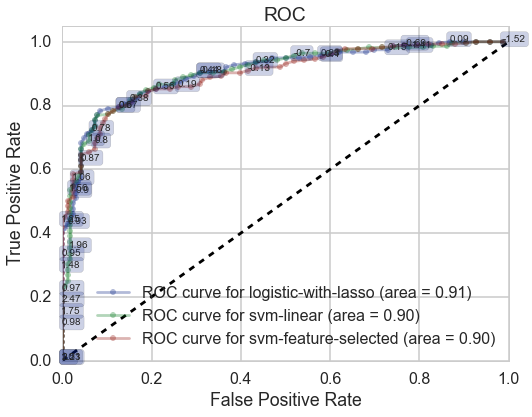

In [220]:
#notice for the first plot we do not pass an axes object. Subsequent calls to
#make_roc can use the returned axes object ax.
with sns.color_palette("dark"):
    ax=make_roc("logistic-with-lasso",clflog, ytestl, Xtestl, labe=30, skip=5)
    make_roc("svm-linear",clflin, ytests, Xtests, ax, labe=50, proba=False, skip=5);
    make_roc("svm-feature-selected",pipelinearsvm, ytestp, Xtestp, ax, labe=40, proba=False, skip=5);


The ROC curves show the three classifiers at different threshold. Here we see the three classifiers are almost identical, with logistic having greatest area (0.91), slightly better than the other two. The accuracy comparison couldn't tell much either, as the accuracies are almost same for the three. Since we have a binary life satsifaction levels and ROC of logistic is slightly better, let's use logistic for prediction.

<a id='6.3'></a>
### 6. 3 Prediction and Summary

In [221]:
#predicting results
clfpred=clflog.predict(Xtestl)

In [222]:
#match test datset back with covariate values 
pd_X = pd.DataFrame(Xtestl, columns=PARAMS)
pd_ytest = pd.DataFrame(ytestl, columns=['test_satis'])
pd_ypred = pd.DataFrame(clfpred, columns=['pred_satis'])
final_test = pd.concat([pd_X, pd_ytest,pd_ypred],axis=1)
newdf=final_test.set_index([itest])

In [223]:
#create two datasets: successfully predicted as satisfied above avg;successfully predicted as unsatisfied above avg
correct_0 = newdf[(newdf.test_satis==1) & (newdf.pred_satis)]
correct_1 = newdf[(newdf.test_satis==0) & (newdf.pred_satis)]

In [224]:
correct_1.head()

gender  residence_status  marital_status  disability1  disability2  disability3  disability4  disability5  chronic_disease1  chronic_disease2  chronic_disease3  chronic_disease4  chronic_disease5  chronic_disease6  chronic_disease7  chronic_disease8  chronic_disease9  chronic_disease10  chronic_disease11  chronic_disease12  chronic_disease13  chronic_disease14  eyesight_far  eyesight_close  hearing  m_frustrated  m_sad  m_enthusiastic  m_lonely  m_content  m_worried  m_bored  m_happy  \
267        2                 2               5            2            2            2            2            2                 1                 2                 2                 2                 2                 2                 2                 2                 2                  1                  2                  2                  1                  2             5               4        5             2      2               5         1          3          3        1        3   
1044       2                 1               1            2            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             4               3        3             1      1               1         1          1          1        1        2   
397        2                 1               5            1            2            2            2            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             4               2        4             4      1               4         3          2          2        1        2   
263        2                 1               5            2            2            2            1            2                 2                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             3               3        5             4      1               1         3          3          1        1        1   
1029       1                 2               1            2            2            1            2            2                 1                 2                 2                 2                 2                 2                 2                 2                 2                  2                  2                  2                  2                  2             4               3        4             1      1               3         1          3          1        1        1   

      m_angry  m_tired  m_stressed  m_pain  night_sleeping_time  day_nap_time  whether_smoke  n_smoke_daily  drink_freq  d_bother_by_things  d_keeping_mind  d_depressed  d_effort_needed  d_hopeful  d_fearful  d_restless  d_happy     ...       i_crops  i_livestock  i_products  i_business  week_food_buy  week_expend_food_own  week_alcohol_tobacco  month_communication  month_utilities  month_fuels  month_servants  month_transportation  month_dailyitems  month_entertainment  year_clothing  \
267         3        1           1       1            -1.011275     -0.809623              2      -0.189101           3                   4               4            3                3          3          4           3        3     ...     -0.292121    -0.104629   -0.055774   -0.191753      -0.891574             -0.241915             -0.260177            -0.166627        -0.881174    -0.230555       -0.078005             -0.313974         -0.144891            -0.159316      -0.415612   
1044        1        1         

Now let's look at the L1-logistic predictors, and look at some example individuals who have been successfully predicted on life satisfaction binary results. 

In [225]:
#chosen predictors
len(clflog.coef_[0])
candidates = pd.DataFrame(clflog.coef_[0],index=PARAMS, columns=['x'])
predictors =candidates[candidates.x!=0]
len(predictors)

27

In [226]:
#listing predictors 
pred_list =[]
for i in predictors.index.values:
    pred_list.append(i)

#include only real predictors
correct_0_p=correct_0[pred_list]
correct_1_p=correct_1[pred_list]

In [227]:
#L1-logstic regression predictors:
pred_list

['chronic_disease7',
 'chronic_disease13',
 'eyesight_far',
 'hearing',
 'm_content',
 'm_worried',
 'm_happy',
 'm_pain',
 'n_smoke_daily',
 'drink_freq',
 'd_bother_by_things',
 'd_depressed',
 'd_effort_needed',
 'd_hopeful',
 'd_happy',
 'd_lonely',
 'd_life_going',
 'i_business',
 'month_servants',
 'year_heating',
 'year_goods',
 'year_automobile',
 'living_standard_compare_neighbor',
 'living_standard_compare_county',
 'income_year',
 'child_residence_distance',
 'age']

In [228]:
#some examples of individuals, correctly predicted by L1-logistic:
correct_1_p.head()


chronic_disease7  chronic_disease13  eyesight_far  hearing  m_content  m_worried  m_happy  m_pain  n_smoke_daily  drink_freq  d_bother_by_things  d_depressed  d_effort_needed  d_hopeful  d_happy  d_lonely  d_life_going  i_business  month_servants  year_heating  year_goods  year_automobile  living_standard_compare_neighbor  living_standard_compare_county  income_year  child_residence_distance       age
267                  2                  1             5        5          3          3        3       1      -0.189101           3                   4            3                3          3        3         4             2   -0.191753       -0.078005     -0.353686   -0.362380        -0.127273                                 4                               5    -0.298784                  1.239379  0.764069
1044                 2                  2             4        3          1          1        2       1      -0.189101           3                   2            2                2          3        3         1             2   -0.191753       -0.078005     -0.353686   -0.362380        -0.127273                                 3                               3    -0.298784                  1.239379 -0.266319
397                  2                  2             4        4          2          2        2       1      -0.189101           3                   3            3                4          1        2         3             3   -0.191753       -0.078005      4.615679    0.831884        -0.127273                                 3                               6    -0.298784                 -0.840336  2.309650
263                  2                  2             3        5          3          1        1       3      -0.189101           2                   1            2                3          3        2         2             3   -0.191753       -0.078005     -0.353686   -0.362380        -0.127273                                 4                               3    -0.298784                 -0.840336  0.970146
1029                 2                  2             4        4          3          1        1       1      -0.189101           3                   2            2                2          2        2         3             1   -0.191753       -0.078005     -0.353686   -0.362380        -0.127273                                 4                               5    -0.298784                  1.239379  2.000534


Listed above are 5 example individuals who rated life satisfaction as "satisfactory" category (including level 1 and 2) and are correctly predicted based on 27 predictors. let's take one and read back that person's original response (before standardizing the continuous covariates).

In [4]:
final_p5 = pd.read_csv("final_i.csv")
final_p5[pred_list+['satis_i']].iloc[267,]

chronic_disease7                        2
chronic_disease13                       2
eyesight_far                            4
hearing                                 3
m_content                               1
m_worried                               1
m_happy                                 1
m_pain                                  1
n_smoke_daily                           0
drink_freq                              3
d_bother_by_things                      1
d_depressed                             1
d_effort_needed                         1
d_hopeful                               1
d_happy                                 4
d_lonely                                1
d_life_going                            1
i_business                              0
month_servants                          0
year_heating                         1000
year_goods                           1000
year_automobile                         0
living_standard_compare_neighbor        3
living_standard_compare_county    

So for this individual listed above, aged 62, not diagnose with arthritis or rheumatism or heart attack, doen't smoke at all, doesn't really drink much, fair eyesight and hearing, thinks his/her living standrad compared to neighbor or county is so-so, income/year is 18000 - well, this inidviudual seems quite "average" on the features and leads a quite healthy life style, and he chose quite satisfied, and our prediction corresponds with the result. 

**Prediction Summary**

"life satisfaction" is a very good index to assess individual's life quality, and it is associated with too many facets of one's life. Based on collectable personal information, we can now make predictions about a person's life satisfaction to some extent. On our website, we posted a [sample questionnaire](https://sites.google.com/site/cs109mamamia/ass_pred) of the information we need for making the prediction. Since CHARLES is a longitudinal study, we could validate our predictions in the future e.g. 2015, 2017 etc.

End.Thanks for reading. And Thank you Andy :)